Aleksandra Bednarczuk

# Survey on Municipal Services of Barcelona's City

Source of the data: 

https://opendata-ajuntament.barcelona.cat/data/en/dataset/esm-bcn-evo

https://opendata-ajuntament.barcelona.cat/doc/BackOff_DescCompDefCamps/EnquestaServeisMunicipals_BCN/2019_Any/2019_r19006_ESM_Questionari_v1_0.pdf

In [1]:
import pandas as pd
import numpy as np

import geopandas as gpd
import contextily as cx

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# 1.1. Reading the data

In [2]:
survey = pd.read_csv('../data/survey/2019_r19006_esm_evolucio_bdd_v1_0/2019_r19006_esm_evolucio_bdd_v1_0.csv', low_memory=False)

In [3]:
survey.head()

,Unnamed: 0,ID,ANY,NOM_DISTRICTE,NOM_BARRI,DATA_ENQ,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,RES_HAB,PADRO,...,DEM_BARRI_N1,CONSULTA_DIARI_Q01_N1,CONSULTA_DIARI_Q02_N1,VEURE_TELE_Q01_N1,VEURE_TELE_Q02_N1,VEURE_TELE_Q03_N1,HAB_COTXE_PART_1A4,US30D_XARXES_Q06,US30D_XARXES_Q07,PMI_1A3_2017
0,1,198900001,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TV3,NaN,NaN,CAP,NaN,NaN,NaN
1,2,198900002,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ALTRES,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
2,3,198900003,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
3,4,198900004,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,EL PERIÓDICO,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
4,5,198900005,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TV3,NaN,NaN,CAP,NaN,NaN,NaN


In [4]:
survey.shape

(135813, 286)

In [5]:
survey.columns.tolist()

['Unnamed: 0',
 'ID',
 'ANY',
 'NOM_DISTRICTE',
 'NOM_BARRI',
 'DATA_ENQ',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'RES_HAB',
 'PADRO',
 'EVO1A_BCN',
 'EVO1A_CAT',
 'EVO1A_ESP',
 'FUTUR_BCN',
 'FUTUR_CAT',
 'FUTUR_ESP',
 'SATISF_RES_BCN_0A10',
 'PROB_BCN',
 'PROB_CAT',
 'PROB_ESP',
 'PROB_PERS',
 'VAL_GESTMUNI',
 'VAL_GESTGENE',
 'VAL_GESTGOESP',
 'DEM_BCN_MUNI',
 'VAL_ESCOMBRARIES',
 'VAL_NETEJA',
 'VAL_SOROLL',
 'VAL_VERD',
 'VAL_ENLLUM',
 'VAL_URBA',
 'VAL_ASFALT',
 'VAL_FACANES',
 'VAL_CIRCUL',
 'VAL_APARCA',
 'VAL_BUS',
 'VAL_METRO',
 'VAL_TRAM',
 'VAL_BICING',
 'VAL_GUB',
 'VAL_SPEIS',
 'VAL_SEGUR',
 'VAL_SEGUR_BARRI',
 'VAL_ESPORT',
 'VAL_SIAC',
 'VAL_CSS',
 'VAL_CULT',
 'VAL_FESTESPOP',
 'VAL_MERCAT',
 'VAL_BIBLIO',
 'VAL_CC',
 'EVO1A_ESCOMBRARIES',
 'EVO1A_NETEJA',
 'EVO1A_SOROLL',
 'EVO1A_VERD',
 'EVO1A_ENLLUM',
 'EVO1A_URBA',
 'EVO1A_ASFALT',
 'EVO1A_FACANES',
 'EVO1A_CIRCUL',
 'EVO1A_APARCA',
 'EVO1A_BUS',
 'EVO1A_METRO',
 'EVO1A_TRAM',
 'EVO1A_BICING',
 'EVO1A_GUB',
 'E

In [6]:
for i in survey.columns.tolist():
    print(i, survey[i].unique(), "\n")

Unnamed: 0 [     1      2      3 ... 135811 135812 135813] 

ID [198900001 198900002 198900003 ... 201907061 201907062 201907063] 

ANY [1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019] 

NOM_DISTRICTE ['CIUTAT VELLA' 'SANT MARTÍ' 'EIXAMPLE' 'SANTS - MONTJUÏC' 'LES CORTS'
 'SARRIÀ - SANT GERVASI' 'GRÀCIA' 'HORTA - GUINARDÓ' 'NOU BARRIS'
 'SANT ANDREU'] 

NOM_BARRI [nan 'EL RAVAL' 'EL BARRI GÒTIC' 'LA BARCELONETA'
 'SANT PERE, SANTA CATERINA I LA RIBERA' 'EL FORT PIENC'
 'LA SAGRADA FAMÍLIA' "LA DRETA DE L'EIXAMPLE"
 "L'ANTIGA ESQUERRA DE L'EIXAMPLE" "LA NOVA ESQUERRA DE L'EIXAMPLE"
 'SANT ANTONI' 'EL POBLE SEC' 'LA MARINA DEL PRAT VERMELL'
 'LA MARINA DE PORT' 'LA FONT DE LA GUATLLA' 'HOSTAFRANCS' 'LA BORDETA'
 'SANTS-BADAL' 'SANTS' 'LES CORTS' 'LA MATERNITAT I SANT RAMON'
 'PEDRALBES' 'VALLVIDRERA, EL TIBIDABO I LES PLANES' 'SARRIÀ'
 'LES TRES TORRES' 'SANT GERVASI-LA BONANOVA'

VAL_BUS ['7' '5' '8' '4' '2' '9' '6' '10 = EXCEL·LENT GESTIÓ' '3'
 '0 = PÈSSIMA GESTIÓ' 'NO HO SAP' '1' 'NO CONTESTA' nan] 

VAL_METRO ['7' '5' '9' '8' '6' '2' 'NO HO SAP' '10 = EXCEL·LENT GESTIÓ' '3' '4'
 '0 = PÈSSIMA GESTIÓ' '1' 'NO CONTESTA' nan] 

VAL_TRAM [nan '5' '7' 'NO HO SAP' '9' '8' 'NO CONTESTA' '4'
 '10 = EXCEL·LENT GESTIÓ' '6' '2' '3' '1' '0 = PÈSSIMA GESTIÓ'] 

VAL_BICING [nan 'NO HO SAP' '0 = PÈSSIMA GESTIÓ' '6' '7' '9' '5' '8'
 '10 = EXCEL·LENT GESTIÓ' '4' '3' 'NO CONTESTA' '2' '1'] 

VAL_GUB [nan '1' '6' '8' '5' '9' '4' '7' '10 = EXCEL·LENT GESTIÓ'
 '0 = PÈSSIMA GESTIÓ' '3' '2' 'NO HO SAP' 'NO CONTESTA'] 

VAL_SPEIS [nan 'NO HO SAP' 'NO CONTESTA' '8' '7' '4' '10 = EXCEL·LENT GESTIÓ' '9'
 '6' '5' '0 = PÈSSIMA GESTIÓ' '2' '3' '1'] 

VAL_SEGUR ['5' '3' '8' '0 = PÈSSIMA GESTIÓ' '6' '4' 'NO CONTESTA' '1' '2' '7'
 '10 = EXCEL·LENT GESTIÓ' '9' nan 'NO HO SAP'] 

VAL_SEGUR_BARRI ['3' '5' '0 = PÈSSIMA GESTIÓ' '4' '7' '1' '6' '2' '10 = EXCEL·LENT GESTIÓ'
 'NO CONTESTA' '9' '8' n

HAB_HIP [nan 'NO' 'SÍ' 'NO CONTESTA' 'NO HO SAP'] 

COST_HIP_NRE [    nan  700.    300.    600.    500.    790.    400.    670.    900.
  750.    350.    360.    150.   1000.    327.    430.    285.    550.
   60.    160.    450.    312.    110.    267.    140.    850.   1100.
  220.    620.    355.    403.    520.    530.    250.    340.    800.
 1200.    260.    380.    190.    370.   1375.    650.   1250.   1500.
  630.    482.    680.    690.    200.    890.    286.   1400.    302.
  490.    915.    440.    770.    320.    311.    480.    460.    363.
  420.    280.    950.    774.    583.   1600.    580.    290.    397.
  533.    599.    465.    410.    970.    364.    455.   1300.    570.
  170.    217.    169.     10.    560.     15.   1050.    625.    640.
   87.    330.    415.    705.    114.    230.    210.    780.    661.
 2000.   1800.    515.    860.   1150.    425.    929.   2150.   2500.
  880.    710.    894.    388.    120.    590.    100.    510.    243.
  412.    47

US30D_XARXES_Q05 [nan 'ALTRES NO XARXES' 'ALTRES XARXES' 'LINKEDIN' 'TUENTI' 'INSTAGRAM'
 'GOOGLEPLUS' 'PINTEREST' 'TWITTER'] 

US_INTERNET_MOBIL_1A3 [nan 'SÍ' 'NO' 'NO TÉ TELÈFON MÒBIL' 'NO HO SAP' 'NO CONTESTA'] 

IDEO_1A8 ['NO HO SAP / NO LI INTERESSA' 'CENTRE' 'ESQUERRA' 'CENTRE ESQUERRA'
 'DRETA' 'CENTRE DRETA' 'EXTREMA ESQUERRA' 'EXTREMA DRETA' 'APOLÍTIC'
 'NO CONTESTA'] 

SENTPERTI [nan 'TAN ESPANYOL COM CATALÀ' 'MÉS CATALÀ QUE ESPANYOL'
 'ÚNICAMENT CATALÀ' 'ÚNICAMENT ESPANYOL' 'NO HO SAP'
 'MÉS ESPANYOL QUE CATALÀ' 'NO CONTESTA' 'ALTRES'] 

MUNI_VOTAR [nan 'NO VA PODER VOTAR (NACIONALITAT, EDAT, PROBLEMES AMB EL CENS)'
 'VA VOTAR' 'NO VA VOTAR' 'NO ESTAVA CENSAT/ADA A LA CIUTAT' 'NO CONTESTA'
 'NO RECORDA SI VA VOTAR'] 

MUNI_PARTIT ['NO CONTESTA' 'NO VA VOTAR' 'PSC - PSOE (JAUME COLLBONI)'
 'PP (ALBERTO FERNÁNDEZ DÍAZ)' 'ICV - EUIA (RICARD GOMÀ)'
 'CIU (XAVIER TRIAS)' 'ERC (ALFRED BOSCH)' 'NO HO SAP / NO HO RECORDA'
 'ALTRES' 'EN BLANC' nan 'NUL'
 'CUP - CAPGIREM BARCELONA (MA

HAB_TREB_1A4 [nan 'UNA' 'DUES' 'TRES' 'CAP' 'QUATRE O MÉS' 'NO CONTESTA'] 

HAB_RES_NAC [nan 'NOMÉS ESPANYOLA' 'MÉS ESTRANGERA' 'MÉS ESPANYOLA' 'NOMÉS ESTRANGERA'
 'NO HO SAP / NO CONTESTA' 'IGUAL ESPANYOLA I ESTRANGERA'] 

HAB_CERT_DISC [nan 'NO' 'SÍ'] 

PMI_SEXE [nan 'DONA' 'HOME' 'NO HO SAP' 'NO CONTESTA'] 

PMI_TRAMSEDAT [nan 'DE 25 A 34 ANYS' 'DE 65 ANYS I MÉS' 'DE 35 A 44 ANYS'
 'DE 45 A 54 ANYS' 'DE 55 A 64 ANYS' 'DE 18 A 24 ANYS' 'NO HO SAP'
 'MENYS DE 18 ANYS' 'NO CONTESTA'] 

PMI_ESTUDIS_1A6 [nan 'SECUNDARIS PROFESSIONALS' 'OBLIGATORIS' 'UNIVERSITARIS'
 'SECUNDARIS GENERALS' 'ESTUDIS OBLIGATORIS NO FINALITZATS' 'NO HO SAP'
 'NO CONTESTA' 'POST UNIVERSITARIS'] 

PMI_SITLABORAL [nan 'JUBILAT/ADA / PENSIONISTA / INCAPACITAT/ADA LABORAL'
 'TASQUES DE LA LLAR (NO REMUNERADES)' 'ATURAT/ADA / BUSCA FEINA'
 'TREBALLA PER COMPTE PROPI (EMPRESARI, AUTÒNOM)'
 "TREBALLA PER COMPTE D'ALTRI (ASSALARIAT/ADA)" 'ESTUDIANT' 'NO HO SAP'
 'NO CONTESTA'] 

PMI_PROF_ACT [nan 'PROFESSIONAL / TÈCNIC

PMI_1A3_2017 [nan 'ENTREVISTAT/ADA' 'UNA ALTRA PERSONA DE LA LLAR'
 'UNA ALTRA PERSONA DE FORA DE LA LLAR'] 



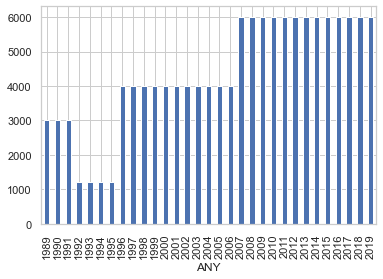

In [7]:
survey.groupby(['ANY']).size().plot.bar()

In [8]:
survey = survey.query('ANY >= 2007')

In [9]:
survey.shape

(78013, 286)

# 1.2. Translating the data from Catalan to English and subsetting the DataFrame to only relevant columns (survey questions)

As the survey is conducted in Catalan, the data is also saved in this language. In this section the data is being translated into English. The translation was done by the author.

In [10]:
# Reading questions dataset with a flag indicating if the question is relevant for further analysis
questions = pd.read_excel('../data/survey/survey_filtered/2019_r19006_ESM_Evolucio_BDD_Metainformacio_Preguntes_v1_0.xlsx')

In [11]:
questions.head()

,Nom_variable,Flag,Pregunta,Question,Tipus_variable
0,ID,0,IDENTIFICADOR DE L'ENQUESTA,SURVEY IDENTIFIER,numeric
1,ANY,1,ANY DE L'ENQUESTA,SURVEY YEAR,numeric
2,NOM_DISTRICTE,1,DISTRICTE MUNICIPAL,DISTRICT,factor
3,NOM_BARRI,1,BARRI,BARRI,factor
4,GRANBARRI,1,GRAN BARRI,GRAN BARRI,factor


In [12]:
questions.shape

(285, 5)

In [13]:
# Filtering out unnecessary questions
questions = questions.query('Flag == 1')
questions.head()

,Nom_variable,Flag,Pregunta,Question,Tipus_variable
1,ANY,1,ANY DE L'ENQUESTA,SURVEY YEAR,numeric
2,NOM_DISTRICTE,1,DISTRICTE MUNICIPAL,DISTRICT,factor
3,NOM_BARRI,1,BARRI,BARRI,factor
4,GRANBARRI,1,GRAN BARRI,GRAN BARRI,factor
6,SEXE,1,SEXE,SEX,factor


In [14]:
questions.shape

(139, 5)

In [15]:
# Dictionary with Catalan and Spanish names/descriptions of questions
df = questions[['Nom_variable', 'Question']]
questions_dict = {}
for i in range(len(df)):
    questions_dict[df.iloc[i].Nom_variable] = df.iloc[i].Question
questions_dict

{'ANY': 'SURVEY YEAR',
 'NOM_DISTRICTE': 'DISTRICT',
 'NOM_BARRI': 'BARRI',
 'GRANBARRI': 'GRAN BARRI',
 'SEXE': 'SEX',
 'EDAT1899_1A6': 'AGE',
 'NACIO_ACT_UE': 'WHAT IS YOUR NATIONALITY?',
 'TMP_RES_BCN_1A6': 'HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?',
 'TMP_RES_BARRI_1A6': 'HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?',
 'EVO1A_BCN': 'DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?',
 'FUTUR_BCN': 'FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?',
 'SATISF_RES_BCN_0A10': 'ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?',
 'SATISF_RES_BCN_1A4': 'ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA? - GROUPED',
 'VAL_GESTMUNI': 'ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY

In [16]:
# Filtering the table by choosing only those questions which are relevant for further analysis
survey = survey[list(questions.Nom_variable.unique())]

In [17]:
survey.head()

,ANY,NOM_DISTRICTE,NOM_BARRI,GRANBARRI,SEXE,EDAT1899_1A6,NACIO_ACT_UE,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,EVO1A_BCN,...,CLASSESOC_ENT,SENTPERTI,MUNI_VOTAR,LLOC_NAIX_1A4,LLENGUA_HAB,ESTUDIS_1A6,RESUM_PARENTIU,HAB_RES_1A4,TE_CERT_DISCAP,HAB_CERT_DISC
57800,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,HOME,DE 25 A 34 ANYS,ESPANYOLA,MÉS DE 5 ANYS I FINS A 10 ANYS,MÉS DE 5 ANYS I FINS A 10 ANYS,HA MILLORAT,...,CLASSE MITJANA-MITJANA,MÉS ESPANYOL QUE CATALÀ,NaN,ESTRANGER,CASTELLÀ,SECUNDARIS PROFESSIONALS,PARELLA AMB FILLS,QUATRE O MÉS,NaN,NaN
57801,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,HOME,DE 65 ANYS I MÉS,ESPANYOLA,SEMPRE HA VISCUT A LA CIUTAT,SEMPRE HA VISCUT AL BARRI,HA MILLORAT,...,CLASSE MITJANA-BAIXA,TAN ESPANYOL COM CATALÀ,NaN,BARCELONA CIUTAT,CATALÀ,OBLIGATORIS,PARELLA SOLA,DUES,NaN,NaN
57802,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,HOME,DE 25 A 34 ANYS,ESPANYOLA,SEMPRE HA VISCUT A LA CIUTAT,SEMPRE HA VISCUT AL BARRI,ESTÀ IGUAL,...,CLASSE MITJANA-MITJANA,TAN ESPANYOL COM CATALÀ,NaN,BARCELONA CIUTAT,CASTELLÀ,UNIVERSITARIS,PARELLA AMB FILLS,QUATRE O MÉS,NaN,NaN
57803,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,DONA,DE 45 A 54 ANYS,ESPANYOLA,SEMPRE HA VISCUT A LA CIUTAT,MÉS DE 2 ANYS I FINS A 5 ANYS,HA MILLORAT,...,CLASSE MITJANA-BAIXA,TAN ESPANYOL COM CATALÀ,NaN,BARCELONA CIUTAT,CASTELLÀ,SECUNDARIS PROFESSIONALS,PERSONA SOLA,UNA,NaN,NaN
57804,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,HOME,DE 35 A 44 ANYS,ALTRES UNIÓ EUROPEA,MÉS DE 10 ANYS,MÉS DE 10 ANYS,HA MILLORAT,...,CLASSE MITJANA-MITJANA,TAN ESPANYOL COM CATALÀ,NaN,ESTRANGER,CASTELLÀ,SECUNDARIS GENERALS,PARELLA SOLA,DUES,NaN,NaN


In [18]:
# Reading answers dataset with a flag indicating if the answer relates to the question
# which was tagged as relevant for further analysis or not
answers = pd.read_excel('../data/survey/survey_filtered/2019_r19006_ESM_Evolucio_BDD_Metainformacio_Respostes_v1_0.xlsx')

In [19]:
answers.head()

,Nom_variable,Flag,Resposta,Answer
0,NOM_DISTRICTE,1,CIUTAT VELLA,CIUTAT VELLA
1,NOM_DISTRICTE,1,EIXAMPLE,EIXAMPLE
2,NOM_DISTRICTE,1,SANTS - MONTJUÏC,SANTS - MONTJUÏC
3,NOM_DISTRICTE,1,LES CORTS,LES CORTS
4,NOM_DISTRICTE,1,SARRIÀ - SANT GERVASI,SARRIÀ - SANT GERVASI


In [20]:
answers.shape

(4529, 4)

In [21]:
answers = answers.query('Flag == 1')
answers.head()

,Nom_variable,Flag,Resposta,Answer
0,NOM_DISTRICTE,1,CIUTAT VELLA,CIUTAT VELLA
1,NOM_DISTRICTE,1,EIXAMPLE,EIXAMPLE
2,NOM_DISTRICTE,1,SANTS - MONTJUÏC,SANTS - MONTJUÏC
3,NOM_DISTRICTE,1,LES CORTS,LES CORTS
4,NOM_DISTRICTE,1,SARRIÀ - SANT GERVASI,SARRIÀ - SANT GERVASI


In [22]:
answers.shape

(1014, 4)

As the survey was conducted in Catalan or Spanish and the answers are recorded in Catalan it needs to be translated into English for better understanding of the responses. The survey was initially translated on metadata tables with questions (Preguntas) and answers (Respostes). Below, I create a dictionary translating_answers with question name (Nom_variable) as a key and temp_dict as a value. Temp_dict is a nested dictionary, with Catalan answer as a key and English translation of this answer as a value.


In [23]:
translating_answers = {}
for i in answers.Nom_variable.unique():
    temp_dict = {}
    temp_dict[str(np.nan)] = np.nan
    df = answers.query('Nom_variable == @i')
    for j in range(len(df)):
        temp_dict[str(df.iloc[j].Resposta)] = df.iloc[j].Answer
    translating_answers[i] = temp_dict

In [24]:
survey['VAL_BUS_1A2'].unique()

array(['APROVAT (5 A 10)', 'SUSPÈS (0 A 4)', 'NS / NC'], dtype=object)

In [25]:
translating_answers['VAL_BUS_1A2']

{'nan': nan,
 'SUSPÈS (0 A 4)': 'BAD (0 TO 4)',
 'APROVAT (5 A 10)': 'GOOD (5 TO 10)',
 'NS / NC': "I DON'T KNOW / NO ANSWER"}

In [26]:
# Using a for loop, the survey is being translated by replacing Catalan version of an answer
# with its English translation using translating_answers dictionary created above.
for column in [i for i in list(survey.columns) if i not in ["ANY", "COST_LLOGUER_NRE", "COST_ESPAI_NRE"]]:
    translate = translating_answers[column]
    for i in survey[column].unique():
        survey[column].replace(i, translate[str(i)], inplace=True)

In [27]:
survey['VAL_BUS_1A2'].unique()

array(['GOOD (5 TO 10)', 'BAD (0 TO 4)', "I DON'T KNOW / NO ANSWER"],
      dtype=object)

# 1.3. Subsetting the data to responses of people aged 65+ 
For further analysis we will use the data from 2008-2019 Surveys with responses of people aged 65 years and more. Data from 2008-2018 will be used for training the models and data from 2019 - for testing.

In [28]:
survey.groupby(['EDAT1899_1A6']).size()

EDAT1899_1A6
65 YEARS AND OVER      19582
FROM 18 TO 24 YEARS     5856
FROM 25 TO 34 YEARS    14092
FROM 35 TO 44 YEARS    15191
FROM 45 TO 54 YEARS    12730
FROM 55 TO 64 YEARS    10562
dtype: int64

In [29]:
survey_65 = survey.query('EDAT1899_1A6 == "65 YEARS AND OVER"')

In [30]:
survey_65.shape

(19582, 139)

In [31]:
survey_65.groupby(['CANVI_LLOC_RES_1A3']).size()

CANVI_LLOC_RES_1A3
I DON'T KNOW                                           201
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA     1818
I WOULD LIVE OUTSIDE BARCELONA                        2357
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD         15184
NO ANSWER                                                4
OTHERS                                                  18
dtype: int64

In [32]:
for i in survey_65.columns:
    if survey_65[i].isnull().values.any() == True:
        print(i, survey_65[i].isnull().values.any(), "\n   Number of NA values: ", survey_65[i].isnull().sum())

VAL_SOROLL True 
   Number of NA values:  1441
VAL_TRAM True 
   Number of NA values:  15102
VAL_BICING True 
   Number of NA values:  1441
VAL_SPEIS True 
   Number of NA values:  16602
VAL_CC True 
   Number of NA values:  10433
VAL_SOROLL_1A2 True 
   Number of NA values:  1441
VAL_TRAM_1A2 True 
   Number of NA values:  16602
VAL_BICING_1A2 True 
   Number of NA values:  1441
VAL_SPEIS_1A2 True 
   Number of NA values:  16602
VAL_CC_1A2 True 
   Number of NA values:  10433
EVO1A_TRAM True 
   Number of NA values:  15102
EVO1A_BICING True 
   Number of NA values:  1441
EVO1A_SPEIS True 
   Number of NA values:  16602
EVO1A_CC True 
   Number of NA values:  10433
US_APARCA True 
   Number of NA values:  4371
US_TRAM True 
   Number of NA values:  15102
US_BICING True 
   Number of NA values:  1441
US_CC True 
   Number of NA values:  10433
US_ASSOCIA_BARRI True 
   Number of NA values:  16602
HAB_TREBDOM True 
   Number of NA values:  16602
HAB_REGIM_1A5 True 
   Number of NA values:

Columns listed above have many NA values and as these are categorical variables. Those with the highest number of NAs are being removed.

In [33]:
# del survey_65['VAL_TRAM_1A2']
# del survey_65['EVO1A_TRAM']
# del survey_65['US_TRAM'] 
# del survey_65['VAL_BICING_1A2']
# del survey_65['EVO1A_BICING']
# del survey_65['US_BICING']
# del survey_65['VAL_CC_1A2']
# del survey_65['EVO1A_CC']
# del survey_65['US_CC']
# del survey_65['VAL_SPEIS_1A2']
# del survey_65['EVO1A_SPEIS']
# del survey_65['US_APARCA']
# del survey_65['HAB_TREBDOM'] 
# del survey_65['HAB_REGIM_1A5']
# del survey_65['TE_CERT_DISCAP']
# del survey_65['HAB_CERT_DISC']
# del survey_65['COST_LLOGUER_NRE']
# del survey_65['COST_ESPAI_NRE']
# del survey_65['COST_LLOGUER_1A14']
# del survey_65['COST_ESPAI_1A14']

For now, I limit the dataset to 2018 & 2019 data only, as the newest surveys offered more questions (so more variables) about city services as well as personal situation. If the variables turn out to be statistically insignificant, I will go back and extend the year range to perform statistical inference on larger set of data.

In [34]:
survey_65 = survey_65.query('ANY >= 2018')

In [35]:
survey_65.shape

(2980, 139)

In [36]:
survey_65.groupby(['CANVI_LLOC_RES_1A3']).size()

CANVI_LLOC_RES_1A3
I DON'T KNOW                                           35
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA     343
I WOULD LIVE OUTSIDE BARCELONA                        478
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD         2124
dtype: int64

In [37]:
for i in survey_65.columns:
    if survey_65[i].isnull().values.any() == True:
        print(i, survey_65[i].isnull().values.any(), "\n   Number of NA values: ", survey_65[i].isnull().sum())

COST_LLOGUER_NRE True 
   Number of NA values:  2431
COST_LLOGUER_1A14 True 
   Number of NA values:  2330
COST_ESPAI_NRE True 
   Number of NA values:  2979
COST_ESPAI_1A14 True 
   Number of NA values:  2979
TE_CERT_DISCAP True 
   Number of NA values:  1498
HAB_CERT_DISC True 
   Number of NA values:  1498


In [38]:
del survey_65['COST_LLOGUER_NRE']
del survey_65['COST_LLOGUER_1A14']
del survey_65['COST_ESPAI_NRE']
del survey_65['COST_ESPAI_1A14']
del survey_65['TE_CERT_DISCAP']
del survey_65['HAB_CERT_DISC']

In [39]:
for i in survey_65.columns:
    if survey_65[i].isnull().values.any() == True:
        print(i, survey_65[i].isnull().values.any(), "\n   Number of NA values: ", survey_65[i].isnull().sum())

In [40]:
# Creating a copy of the data subset for further data preparation and features generation
data = survey_65.copy()

In [41]:
survey_65.shape, data.shape

((2980, 133), (2980, 133))

# 1.4. Exploratory Data Analysis and data preparation

In [42]:
for i in survey_65.columns.tolist():
    print(i, ":", questions_dict[i])

ANY : SURVEY YEAR
NOM_DISTRICTE : DISTRICT
NOM_BARRI : BARRI
GRANBARRI : GRAN BARRI
SEXE : SEX
EDAT1899_1A6 : AGE
NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?
TMP_RES_BCN_1A6 : HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?
TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?
EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?
FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?
SATISF_RES_BCN_0A10 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?
SATISF_RES_BCN_1A4 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA? - GROUPED
VAL_GESTMUNI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?
VAL_GESTMUNI_1A2 : ON A SCALE FROM 0 TO 10, 0 BEING VERY B

## 1.4.1 Dependent variable

Survey question: IF YOU HAD THE POSSIBILITY AND THE RESOURCES TO CHANGE YOUR RESIDENCE, WHERE WOULD YOU LIVE?

In [43]:
survey_65.groupby(['CANVI_LLOC_RES_1A3']).size()

CANVI_LLOC_RES_1A3
I DON'T KNOW                                           35
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA     343
I WOULD LIVE OUTSIDE BARCELONA                        478
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD         2124
dtype: int64

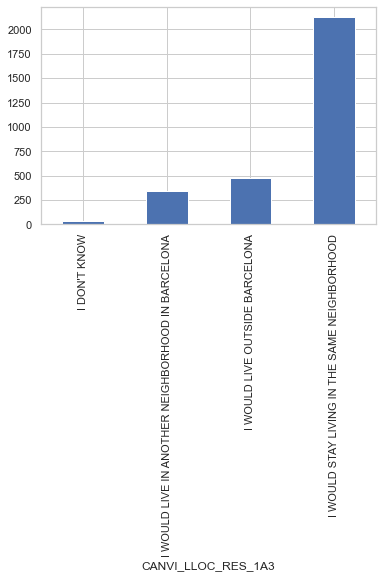

In [44]:
survey_65.groupby(['CANVI_LLOC_RES_1A3']).size().plot.bar()

In [45]:
data_prep = {'I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD': 0,
            'I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA': 1,
             'I WOULD LIVE OUTSIDE BARCELONA': np.nan,
             "I DON'T KNOW": np.nan,
             'NO ANSWER': np.nan
            }
data['Would_not_stay_in_the_neighborhood'] = [data_prep[i] for i in data['CANVI_LLOC_RES_1A3']]

In [46]:
count_stay = len(data[data['Would_not_stay_in_the_neighborhood']==0])
count_move = len(data[data['Would_not_stay_in_the_neighborhood']==1])
pct_of_stay = count_stay/(count_stay + count_move)
print("Number of elderly who would stay in their neighborhood:", count_stay)
print("Percentage of elderly who would stay in their neighborhood:", round(pct_of_stay*100,2), '%')
pct_of_move = count_move/(count_stay + count_move)
print("Number of elderly who would hange their neighborhood or move out from the city:", count_move)
print("Percentage of elderly who would change their neighborhood or move out from the city:", round(pct_of_move*100,2), '%')

Number of elderly who would stay in their neighborhood: 2124
Percentage of elderly who would stay in their neighborhood: 86.1 %
Number of elderly who would hange their neighborhood or move out from the city: 343
Percentage of elderly who would change their neighborhood or move out from the city: 13.9 %


The dataset is imbalanced - there are much more responses of people who would like to stay in their neighborhood than of those who would like to change it or move outside Barcelona.

## 1.4.2 Independent variables

First insight into the dataset using cross tablation of dependent variable and different features:

In [47]:
for i in data.columns.tolist():
    display(pd.crosstab(data[i], data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
ANY,,
2018,1059,179
2019,1065,164


Would_not_stay_in_the_neighborhood,0.0,1.0
NOM_DISTRICTE,,
CIUTAT VELLA,128,26
EIXAMPLE,365,41
GRÀCIA,170,26
HORTA - GUINARDÓ,243,45
LES CORTS,218,10
NOU BARRIS,189,62
SANT ANDREU,171,40
SANT MARTÍ,255,38
SANTS - MONTJUÏC,193,42


Would_not_stay_in_the_neighborhood,0.0,1.0
NOM_BARRI,,
BARÓ DE VIVER,3,3
CAN BARÓ,11,4
CAN PEGUERA,2,1
CANYELLES,16,1
CIUTAT MERIDIANA,9,4
...,...,...
VALLBONA,1,1
VALLCARCA I ELS PENITENTS,23,5
"VALLVIDRERA, EL TIBIDABO I LES PLANES",5,1


Would_not_stay_in_the_neighborhood,0.0,1.0
GRANBARRI,,
"CANYELLES, LES ROQUETES I LA TRINITAT NOVA",43,18
EL BARRI GÒTIC,31,6
"EL BESÒS, EL MARESME I PROVENÇALS",31,11
EL CAMP D'EN GRASSOT I GRÀCIA NOVA,67,7
EL CARMEL I CAN BARÓ,51,17
EL CLOT I EL CAMP DE L'ARPA,54,7
EL FORT PIENC,57,6
EL GUINARDÓ,50,11
"EL PARC, LA LLACUNA I LA VILA OLÍMPICA",47,6


Would_not_stay_in_the_neighborhood,0.0,1.0
SEXE,,
MAN,822,134
WOMAN,1302,209


Would_not_stay_in_the_neighborhood,0.0,1.0
EDAT1899_1A6,,
65 YEARS AND OVER,2124,343


Would_not_stay_in_the_neighborhood,0.0,1.0
NACIO_ACT_UE,,
OTHER EU,27,2
REMAINING COUNTRIES,26,8
SPANISH,2071,333


Would_not_stay_in_the_neighborhood,0.0,1.0
TMP_RES_BCN_1A6,,
FROM 6 MONTHS TO 2 YEARS,15,8
I HAVE ALWAYS LIVED IN THE CITY,910,144
MORE THAN 10 YEARS,1171,184
MORE THAN 2 YEARS AND UP TO 5 YEARS,13,4
MORE THAN 5 YEARS AND UP TO 10 YEARS,15,3


Would_not_stay_in_the_neighborhood,0.0,1.0
TMP_RES_BARRI_1A6,,
FROM 6 MONTHS TO 2 YEARS,32,12
I HAVE ALWAYS LIVED IN THE BARRI,287,20
LESS THAN SIX MONTHS,6,2
MORE THAN 10 YEARS,1713,278
MORE THAN 2 YEARS AND UP TO 5 YEARS,31,15
MORE THAN 5 YEARS AND UP TO 10 YEARS,55,16


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BCN,,
I DON'T KNOW,95,11
IT HAS IMPROVED,620,78
IT'S THE SAME,463,69
IT'S WORSE,944,184
NO ANSWER,2,1


Would_not_stay_in_the_neighborhood,0.0,1.0
FUTUR_BCN,,
I DON'T KNOW,427,62
IT WILL IMPROVE,1179,189
IT WILL STAY THE SAME,83,14
IT WILL WORSE,432,77
NO ANSWER,3,1


Would_not_stay_in_the_neighborhood,0.0,1.0
SATISF_RES_BCN_0A10,,
0,10,1
2,2,0
3,7,1
4,21,8
5,98,22
6,107,20
7,253,53
8,588,103
9,353,36


Would_not_stay_in_the_neighborhood,0.0,1.0
SATISF_RES_BCN_1A4,,
FAIRLY SATISFIED (5 to 6),205,42
I DON'T KNOW / NO ANSWER,10,3
LITTLE / NOT SATISFIED (0 TO 4),40,10
SATISFIED (7 TO 8),841,156
VERY SATISFIED (9 TO 10),1028,132


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GESTMUNI,,
0,59,14
1,14,3
2,33,12
3,84,13
4,161,28
5,406,72
6,360,74
7,438,47
8,348,49


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GESTMUNI_1A2,,
BAD (0 TO 4),351,70
GOOD (5 TO 10),1710,266
I DON'T KNOW / NO ANSWER,63,7


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ESCOMBRARIES,,
0,19,8
1,4,3
2,13,1
3,31,3
4,52,10
5,179,28
6,204,36
7,396,61
8,705,121


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_NETEJA,,
0,52,15
1,14,2
2,52,8
3,75,15
4,145,36
5,299,44
6,295,51
7,395,51
8,486,79


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SOROLL,,
0,85,23
1,24,6
2,65,17
3,102,25
4,176,39
5,357,46
6,284,46
7,317,48
8,371,51


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_VERD,,
0,57,22
1,13,1
2,41,8
3,86,16
4,125,25
5,286,67
6,270,53
7,401,44
8,442,64


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ENLLUM,,
0,23,4
1,4,1
2,14,5
3,38,11
4,92,20
5,208,44
6,288,44
7,466,77
8,603,86


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_URBA,,
0,41,9
1,3,1
2,25,5
3,65,16
4,102,21
5,280,45
6,280,60
7,423,59
8,394,55


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ASFALT,,
0,68,14
1,9,3
2,58,6
3,100,25
4,215,34
5,338,62
6,326,56
7,423,63
8,369,64


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_FACANES,,
0,35,5
1,8,2
2,20,3
3,43,9
4,82,14
5,285,42
6,276,73
7,490,70
8,439,68


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CIRCUL,,
0,81,14
1,18,4
2,67,11
3,153,22
4,238,40
5,389,67
6,333,62
7,317,39
8,273,50


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_APARCA,,
0,260,45
1,50,12
2,159,29
3,215,44
4,284,33
5,305,46
6,173,27
7,134,12
8,99,15


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_BUS,,
0,41,7
1,11,1
2,23,7
3,52,14
4,93,16
5,145,27
6,179,34
7,382,65
8,585,95


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_METRO,,
0,2,1
1,5,0
2,3,3
3,16,2
4,26,6
5,79,17
6,146,23
7,318,61
8,653,112


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_TRAM,,
0,13,3
1,4,0
2,7,2
3,12,2
4,10,6
5,59,11
6,72,13
7,163,29
8,254,43


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_BICING,,
0,120,20
1,12,2
2,37,11
3,63,8
4,84,9
5,133,20
6,116,19
7,147,36
8,194,22


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GUB,,
0,66,11
1,11,3
2,44,14
3,72,21
4,117,21
5,257,49
6,256,36
7,295,52
8,366,58


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SPEIS,,
0,6,1
2,4,1
3,2,3
4,11,3
5,42,10
6,77,12
7,177,24
8,456,68
9,319,63


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SEGUR,,
0,89,20
1,24,2
2,79,21
3,126,24
4,242,48
5,355,51
6,351,52
7,332,47
8,254,32


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SEGUR_BARRI,,
0,75,21
1,21,5
2,52,17
3,102,27
4,180,38
5,299,46
6,299,49
7,376,54
8,420,55


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ESPORT,,
0,48,9
1,7,1
2,19,5
3,36,14
4,59,19
5,141,25
6,131,36
7,280,35
8,296,47


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SIAC,,
0,31,6
1,4,1
2,18,3
3,26,7
4,47,11
5,128,27
6,185,29
7,319,47
8,402,69


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CSS,,
0,30,8
1,2,1
2,19,1
3,30,6
4,50,9
5,95,22
6,113,31
7,199,32
8,312,49


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CULT,,
0,5,5
1,1,1
2,5,1
3,14,6
4,29,11
5,114,26
6,148,21
7,281,62
8,495,61


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_FESTESPOP,,
0,31,6
1,2,0
2,18,2
3,30,6
4,57,14
5,160,29
6,175,35
7,339,61
8,429,53


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_MERCAT,,
0,24,4
1,4,3
2,17,7
3,29,0
4,55,17
5,144,22
6,128,29
7,339,61
8,625,94


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_BIBLIO,,
0,5,2
1,2,0
2,5,0
3,5,0
4,19,2
5,65,7
6,65,14
7,213,38
8,425,72


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CC,,
0,6,6
1,1,0
2,6,2
3,12,1
4,13,5
5,49,11
6,81,11
7,249,46
8,397,55


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ESCOMBRARIES_1A2,,
BAD (0 TO 4),119,25
GOOD (5 TO 10),1996,315
I DON'T KNOW / NO ANSWER,9,3


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_NETEJA_1A2,,
BAD (0 TO 4),338,76
GOOD (5 TO 10),1775,267
I DON'T KNOW / NO ANSWER,11,0


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SOROLL_1A2,,
BAD (0 TO 4),452,110
GOOD (5 TO 10),1547,219
I DON'T KNOW / NO ANSWER,125,14


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_VERD_1A2,,
BAD (0 TO 4),322,72
GOOD (5 TO 10),1668,254
I DON'T KNOW / NO ANSWER,134,17


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ENLLUM_1A2,,
BAD (0 TO 4),171,41
GOOD (5 TO 10),1891,293
I DON'T KNOW / NO ANSWER,62,9


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_URBA_1A2,,
BAD (0 TO 4),236,52
GOOD (5 TO 10),1555,241
I DON'T KNOW / NO ANSWER,333,50


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ASFALT_1A2,,
BAD (0 TO 4),450,82
GOOD (5 TO 10),1629,260
I DON'T KNOW / NO ANSWER,45,1


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_FACANES_1A2,,
BAD (0 TO 4),188,33
GOOD (5 TO 10),1681,278
I DON'T KNOW / NO ANSWER,255,32


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CIRCUL_1A2,,
BAD (0 TO 4),557,91
GOOD (5 TO 10),1426,229
I DON'T KNOW / NO ANSWER,141,23


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_APARCA_1A2,,
BAD (0 TO 4),968,163
GOOD (5 TO 10),762,107
I DON'T KNOW / NO ANSWER,394,73


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_BUS_1A2,,
BAD (0 TO 4),220,45
GOOD (5 TO 10),1758,283
I DON'T KNOW / NO ANSWER,146,15


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_METRO_1A2,,
BAD (0 TO 4),52,12
GOOD (5 TO 10),1755,295
I DON'T KNOW / NO ANSWER,317,36


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_TRAM_1A2,,
BAD (0 TO 4),46,13
GOOD (5 TO 10),730,128
I DON'T KNOW / NO ANSWER,1348,202


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_BICING_1A2,,
BAD (0 TO 4),316,50
GOOD (5 TO 10),701,117
I DON'T KNOW / NO ANSWER,1107,176


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GUB_1A2,,
BAD (0 TO 4),310,70
GOOD (5 TO 10),1454,235
I DON'T KNOW / NO ANSWER,360,38


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SPEIS_1A2,,
BAD (0 TO 4),23,8
GOOD (5 TO 10),1463,240
I DON'T KNOW / NO ANSWER,638,95


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SEGUR_1A2,,
BAD (0 TO 4),560,115
GOOD (5 TO 10),1407,204
I DON'T KNOW / NO ANSWER,157,24


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SEGUR_BARRI_1A2,,
BAD (0 TO 4),430,108
GOOD (5 TO 10),1635,226
I DON'T KNOW / NO ANSWER,59,9


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ESPORT_1A2,,
BAD (0 TO 4),169,48
GOOD (5 TO 10),1032,171
I DON'T KNOW / NO ANSWER,923,124


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SIAC_1A2,,
BAD (0 TO 4),126,28
GOOD (5 TO 10),1389,223
I DON'T KNOW / NO ANSWER,609,92


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CSS_1A2,,
BAD (0 TO 4),131,25
GOOD (5 TO 10),1043,182
I DON'T KNOW / NO ANSWER,950,136


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CULT_1A2,,
BAD (0 TO 4),54,24
GOOD (5 TO 10),1280,213
I DON'T KNOW / NO ANSWER,790,106


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_FESTESPOP_1A2,,
BAD (0 TO 4),138,28
GOOD (5 TO 10),1403,218
I DON'T KNOW / NO ANSWER,583,97


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_MERCAT_1A2,,
BAD (0 TO 4),129,31
GOOD (5 TO 10),1771,279
I DON'T KNOW / NO ANSWER,224,33


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_BIBLIO_1A2,,
BAD (0 TO 4),36,4
GOOD (5 TO 10),1202,213
I DON'T KNOW / NO ANSWER,886,126


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CC_1A2,,
BAD (0 TO 4),38,14
GOOD (5 TO 10),1133,169
I DON'T KNOW / NO ANSWER,953,160


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_ESCOMBRARIES,,
I DON'T KNOW,70,13
IT HAS IMPROVED,726,119
IT'S THE SAME,1067,165
IT'S WORSE,257,46
NO ANSWER,4,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_NETEJA,,
I DON'T KNOW,44,8
IT HAS IMPROVED,660,105
IT'S THE SAME,851,119
IT'S WORSE,568,111
NO ANSWER,1,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_SOROLL,,
I DON'T KNOW,138,15
IT HAS IMPROVED,337,59
IT'S THE SAME,1034,141
IT'S WORSE,613,128
NO ANSWER,2,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_VERD,,
I DON'T KNOW,176,28
IT HAS IMPROVED,774,104
IT'S THE SAME,740,118
IT'S WORSE,428,93
NO ANSWER,6,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_ENLLUM,,
I DON'T KNOW,98,17
IT HAS IMPROVED,651,105
IT'S THE SAME,1162,168
IT'S WORSE,210,53
NO ANSWER,3,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_URBA,,
I DON'T KNOW,337,47
IT HAS IMPROVED,717,107
IT'S THE SAME,702,118
IT'S WORSE,366,70
NO ANSWER,2,1


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_ASFALT,,
I DON'T KNOW,67,8
IT HAS IMPROVED,615,101
IT'S THE SAME,811,124
IT'S WORSE,631,110


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_FACANES,,
I DON'T KNOW,271,39
IT HAS IMPROVED,856,131
IT'S THE SAME,728,129
IT'S WORSE,263,42
NO ANSWER,6,2


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_CIRCUL,,
I DON'T KNOW,175,28
IT HAS IMPROVED,311,48
IT'S THE SAME,729,111
IT'S WORSE,908,156
NO ANSWER,1,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_APARCA,,
I DON'T KNOW,387,66
IT HAS IMPROVED,139,19
IT'S THE SAME,485,64
IT'S WORSE,1109,194
NO ANSWER,4,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BUS,,
I DON'T KNOW,168,21
IT HAS IMPROVED,1124,178
IT'S THE SAME,461,72
IT'S WORSE,370,72
NO ANSWER,1,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_METRO,,
I DON'T KNOW,350,37
IT HAS IMPROVED,838,134
IT'S THE SAME,855,145
IT'S WORSE,77,26
NO ANSWER,4,1


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_TRAM,,
I DON'T KNOW,1423,227
IT HAS IMPROVED,268,43
IT'S THE SAME,390,64
IT'S WORSE,35,8
NO ANSWER,8,1


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BICING,,
I DON'T KNOW,1177,179
IT HAS IMPROVED,351,75
IT'S THE SAME,216,32
IT'S WORSE,375,56
NO ANSWER,5,1


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_GUB,,
I DON'T KNOW,468,55
IT HAS IMPROVED,465,78
IT'S THE SAME,826,128
IT'S WORSE,361,82
NO ANSWER,4,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_SPEIS,,
I DON'T KNOW,805,118
IT HAS IMPROVED,646,100
IT'S THE SAME,583,100
IT'S WORSE,88,25
NO ANSWER,2,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_SEGUR,,
I DON'T KNOW,219,35
IT HAS IMPROVED,304,49
IT'S THE SAME,644,92
IT'S WORSE,954,167
NO ANSWER,3,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_SEGUR_BARRI,,
I DON'T KNOW,99,16
IT HAS IMPROVED,387,31
IT'S THE SAME,1009,157
IT'S WORSE,624,139
NO ANSWER,5,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_ESPORT,,
I DON'T KNOW,957,125
IT HAS IMPROVED,482,75
IT'S THE SAME,563,111
IT'S WORSE,119,29
NO ANSWER,3,3


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_SIAC,,
I DON'T KNOW,696,102
IT HAS IMPROVED,620,90
IT'S THE SAME,673,126
IT'S WORSE,133,25
NO ANSWER,2,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_CSS,,
I DON'T KNOW,1030,157
IT HAS IMPROVED,514,83
IT'S THE SAME,424,67
IT'S WORSE,153,34
NO ANSWER,3,2


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_CULT,,
I DON'T KNOW,857,123
IT HAS IMPROVED,632,101
IT'S THE SAME,539,96
IT'S WORSE,92,22
NO ANSWER,4,1


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_FESTESPOP,,
I DON'T KNOW,637,107
IT HAS IMPROVED,520,76
IT'S THE SAME,731,113
IT'S WORSE,234,47
NO ANSWER,2,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_MERCAT,,
I DON'T KNOW,237,42
IT HAS IMPROVED,1146,167
IT'S THE SAME,454,81
IT'S WORSE,285,52
NO ANSWER,2,1


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BIBLIO,,
I DON'T KNOW,950,141
IT HAS IMPROVED,627,116
IT'S THE SAME,506,83
IT'S WORSE,38,3
NO ANSWER,3,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_CC,,
I DON'T KNOW,997,171
IT HAS IMPROVED,593,76
IT'S THE SAME,483,77
IT'S WORSE,48,17
NO ANSWER,3,2


Would_not_stay_in_the_neighborhood,0.0,1.0
US_VERD,,
DO NOT USE,765,126
USE,1359,217


Would_not_stay_in_the_neighborhood,0.0,1.0
US_APARCA,,
DO NOT USE,1673,266
NO ANSWER,5,0
USE,446,77


Would_not_stay_in_the_neighborhood,0.0,1.0
US_BUS,,
DO NOT USE,378,47
USE,1746,296


Would_not_stay_in_the_neighborhood,0.0,1.0
US_METRO,,
DO NOT USE,630,93
NO ANSWER,1,0
USE,1493,250


Would_not_stay_in_the_neighborhood,0.0,1.0
US_TRAM,,
DO NOT USE,1842,294
NO ANSWER,14,1
USE,268,48


Would_not_stay_in_the_neighborhood,0.0,1.0
US_BICING,,
DO NOT USE,2085,336
NO ANSWER,7,1
USE,32,6


Would_not_stay_in_the_neighborhood,0.0,1.0
US_ESPORT,,
DO NOT USE,1743,275
NO ANSWER,14,1
USE,367,67


Would_not_stay_in_the_neighborhood,0.0,1.0
US_SIAC,,
DO NOT USE,1188,186
NO ANSWER,7,0
USE,929,157


Would_not_stay_in_the_neighborhood,0.0,1.0
US_CSS,,
DO NOT USE,1461,233
NO ANSWER,8,2
USE,655,108


Would_not_stay_in_the_neighborhood,0.0,1.0
US_CULT,,
DO NOT USE,1293,198
NO ANSWER,6,2
USE,825,143


Would_not_stay_in_the_neighborhood,0.0,1.0
US_FESTESPOP,,
DO NOT USE,1226,195
NO ANSWER,3,1
USE,895,147


Would_not_stay_in_the_neighborhood,0.0,1.0
US_MERCAT,,
DO NOT USE,598,103
USE,1526,240


Would_not_stay_in_the_neighborhood,0.0,1.0
US_BIBLIO,,
DO NOT USE,1390,205
NO ANSWER,7,1
USE,727,137


Would_not_stay_in_the_neighborhood,0.0,1.0
US_CC,,
DO NOT USE,1412,235
NO ANSWER,9,1
USE,703,107


Would_not_stay_in_the_neighborhood,0.0,1.0
TRANSP_MOU,,
BICYCLE,9,3
BICYCLE (BICING),2,2
BUS,929,155
CAR,109,12
METRO / CATALAN RAILWAYS (FGC) URBAN,673,119
MOTORCYCLE,24,3
OTHERS,6,2
TAXI,81,7
TRAIN (RENFE / FGC INTERURBAN),4,0


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_TRANSP_1A3,,
I DON'T KNOW / NO ANSWER,64,13
LITTLE / NOTHING EQUIPPED,207,38
NORMAL,146,19
VERY / FAIRLY GIFTED,1707,273


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_TRANSP_BARRI_1A3,,
I DON'T KNOW / NO ANSWER,23,3
LITTLE / NOTHING EQUIPPED,298,48
NORMAL,121,29
VERY / FAIRLY GIFTED,1682,263


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BARRI,,
I DON'T KNOW,33,7
IT HAS IMPROVED,906,114
IT'S THE SAME,749,109
IT'S WORSE,435,113
NO ANSWER,1,0


Would_not_stay_in_the_neighborhood,0.0,1.0
FUTUR_BARRI,,
I DON'T KNOW,411,69
IT WILL GET WORSE,308,74
IT WILL IMPROVE,1195,162
IT WILL STAY THE SAME,209,38
NO ANSWER,1,0


Would_not_stay_in_the_neighborhood,0.0,1.0
SATISF_RES_BARRI_0A10,,
0,4,3
2,1,7
3,1,4
4,10,12
5,41,23
6,84,23
7,202,66
8,628,109
9,490,43


Would_not_stay_in_the_neighborhood,0.0,1.0
SATISF_RES_BARRI_1A4,,
FAIRLY SATISFIED (5 to 6),125,46
I DON'T KNOW / NO ANSWER,6,4
LITTLE / NOT SATISFIED (0 TO 4),16,26
SATISFIED (7 TO 8),830,175
VERY SATISFIED (9 TO 10),1147,92


Would_not_stay_in_the_neighborhood,0.0,1.0
COMPARA_BARRI,,
I DON'T KNOW,59,14
"NEITHER THE BEST, NOR THE WORST",643,189
NO ANSWER,2,0
ONE OF THE BEST,1364,90
ONE OF THE WORST,56,50


Would_not_stay_in_the_neighborhood,0.0,1.0
CANVI_LLOC_RES_1A3,,
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA,0,343
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD,2124,0


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GESTBARRI,,
0,36,15
1,5,1
2,36,9
3,45,12
4,108,20
5,285,60
6,302,60
7,417,59
8,458,46


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GESTBARRI_1A2,,
BAD (0 TO 4),230,57
GOOD (5 TO 10),1685,254
I DON'T KNOW / NO ANSWER,209,32


Would_not_stay_in_the_neighborhood,0.0,1.0
US_ASSOCIA_BARRI,,
NO,1677,286
NO ANSWER,0,1
YES,447,56


Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_COTXE_PART,,
I DON'T WANT / I DON'T NEED,848,136
IT'S NOT POSSIBLE,151,32
NO ANSWER,6,2
YES,1119,173


Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_TREBDOM,,
I DON'T WANT / I DON'T NEED,982,164
IT'S NOT POSSIBLE,392,76
NO ANSWER,6,2
YES,744,101


Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_REGIM_1A5,,
ANOTHER SITUATION,2,0
I DON'T KNOW,2,0
IN FREE ASSIGNMENT,26,8
NO ANSWER,15,1
OCCUPYING,1,0
OWN,1628,261
RENT A ROOM,1,0
RENT A WHOLE PLACE,449,73


Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_M2_1A14,,
FROM 101 TO 110 M2,79,10
FROM 111 TO 120 M2,70,5
FROM 121 TO 130 M2,42,7
FROM 131 TO 140 M2,38,3
FROM 141 TO 150 M2,28,3
FROM 151 TO 160 M2,14,1
FROM 161 TO 170 M2,18,2
FROM 51 TO 60 M2,247,40
FROM 61 TO 70 M2,394,76


Would_not_stay_in_the_neighborhood,0.0,1.0
LLAR_INGRESSOS_1A10,,
"FROM 1,001 TO 1,500 EUROS",398,73
"FROM 1,501 TO 2,000 EUROS",311,55
"FROM 2,001 TO 2,500 EUROS",217,28
"FROM 2,501 TO 3,000 EUROS",146,20
"FROM 3,001 TO 5,000 EUROS",141,14
"FROM 5,001 TO 7,000 EUROS",26,3
"FROM 500 TO 1,000 EUROS",375,76
"FROM 7,001 TO 9,000 EUROS",5,0
I DON'T KNOW,147,13


Would_not_stay_in_the_neighborhood,0.0,1.0
PROB_LLAR_ECON_1A6,,
EASILY,518,81
I DON'T KNOW,14,1
NO ANSWER,32,5
RELATIVELY EASILY,651,79
VERY EASILY,84,14
WITH A LOT OF DIFFICULTY,123,30
WITH DIFFICULTY,236,48
WITH SOME DIFFICULTY,466,85


Would_not_stay_in_the_neighborhood,0.0,1.0
CLASSESOC_ENT,,
HIGH CLASS,13,2
I DON'T KNOW,61,5
LOW CLASS,216,49
MIDDLE-HIGH CLASS,91,13
MIDDLE-LOW CLASS,625,116
MIDDLE-MIDDLE CLASS,1091,154
NO ANSWER,27,4


Would_not_stay_in_the_neighborhood,0.0,1.0
SENTPERTI,,
"HALF SPANISH, HALF CATALAN",816,110
I DON'T KNOW,17,3
MORE CATALAN THAN SPANISH,524,88
MORE SPANISH THAN CATALAN,108,21
NO ANSWER,38,7
ONLY CATALAN,454,77
ONLY SPANISH,118,24
OTHER,49,13


Would_not_stay_in_the_neighborhood,0.0,1.0
MUNI_VOTAR,,
"I CANNOT VOTE (NATIONALITY, AGE, CENSUS PROBLEMS)",36,10
I DID NOT VOTE,187,30
I DON'T REMEMBER IF I VOTED,55,8
IT WASN'T CENSUSED IN THE CITY,25,7
NO ANSWER,9,0
VOTED,1812,288


Would_not_stay_in_the_neighborhood,0.0,1.0
LLOC_NAIX_1A4,,
BARCELONA CITY,996,164
FOREIGN,117,26
NO ANSWER,2,0
REST OF CATALONIA,265,35
REST OF SPAIN,744,118


Would_not_stay_in_the_neighborhood,0.0,1.0
LLENGUA_HAB,,
CATALAN,1108,178
NO ANSWER,2,0
OTHER,17,4
SPANISH,997,161


Would_not_stay_in_the_neighborhood,0.0,1.0
ESTUDIS_1A6,,
COMPULSORY STUDIES HAVE NOT FINISHED,173,23
GENERAL SECONDARY,295,56
MANDATORY,792,131
NO ANSWER,5,0
POST UNIVERSITY,96,11
PROFESSIONAL SECONDARY,386,56
UNIVERSITY,377,66


Would_not_stay_in_the_neighborhood,0.0,1.0
RESUM_PARENTIU,,
COUPLE WITH CHILDREN,216,28
COUPLE WITH NO CHILDREN,922,149
OTHER FAMILY,76,13
OTHER SITUATIONS,24,3
SINGLE,699,126
SINGLE-PARENT WITH CHILDREN,187,24


Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_RES_1A4,,
FOUR OR MORE,89,13
ONE,699,126
THREE,224,29
TWO,1112,175


Would_not_stay_in_the_neighborhood,0.0,1.0
Would_not_stay_in_the_neighborhood,,
0.0,2124,0
1.0,0,343


Some of the features will be used only for statistical description of the sample. Some will be used as independent variables in further modeling. Others will be ignored/dropped.

* ANY : SURVEY YEAR
* NOM_DISTRICTE : DISTRICT - model
* NOM_BARRI : BARRI
* GRANBARRI : GRAN BARRI
* SEXE : SEX - model
* NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?
* SENTPERTI : BELONGING - SPANISH VS CATALAN
* LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE?
* ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES?
* LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH?

* TMP_RES_BCN_1A6 : HOW LONG HAVE YOU BEEN LIVING IN BARCELONA? - model
* TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD? - model


* EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED? - model
* FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE? - model
* SATISF_RES_BCN_0A10 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?  - model
* or grouped of the above - SATISF_RES_BCN_1A4
* VAL_GESTMUNI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?  - model
* or grouped of the above - VAL_GESTMUNI_1A2


* EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?  - model
* FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE?  - model
* SATISF_RES_BARRI_0A10 : ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD? - model
* or grouped of the above - SATISF_RES_BARRI_1A4 
* COMPARA_BARRI : DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST? - model
* VAL_GESTBARRI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD? - model
* or grouped of the above - VAL_GESTBARRI_1A2


* VAL_ESCOMBRARIES_1A2 : CITY SERVICES - RATE: GARBAGE COLLECTION, VAL_NETEJA_1A2 : CITY SERVICES - RATE: STREETS CLEANING, VAL_SOROLL_1A2 : CITY SERVICES - RATE: NOISE, VAL_VERD_1A2 : CITY SERVICES - RATE: GREEN AREAS, VAL_ENLLUM_1A2 : CITY SERVICES - RATE: PUBLIC LIGHTING, VAL_URBA_1A2 : CITY SERVICES - RATE: URBANISM, VAL_ASFALT_1A2 : CITY SERVICES - RATE: ASPHALT AND STREET CONSERVATION, VAL_FACANES_1A2 : CITY SERVICES - RATE: FACADES AND BUILDING CONSERVATION, VAL_CIRCUL_1A2 : CITY SERVICES - RATE: CIRCULATION, VAL_APARCA_1A2 : CITY SERVICES - RATE: PARKING, VAL_BUS_1A2 : CITY SERVICES - RATE: BUS, VAL_METRO_1A2 : CITY SERVICES - RATE: SUBWAY, VAL_TRAM_1A2 : CITY SERVICES - RATE: TRAM, VAL_BICING_1A2 : CITY SERVICES - RATE: BICING, VAL_GUB_1A2 : CITY SERVICES - RATE: MUNICIPAL POLICE, VAL_SPEIS_1A2 : CITY SERVICES - RATE: FIREFIGHTERS, VAL_SEGUR_1A2 : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE, VAL_SEGUR_BARRI : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD, VAL_ESPORT_1A2 : CITY SERVICES - RATE: SPORTS FACILITIES, VAL_SIAC_1A2 : CITY SERVICES - RATE: CITIZEN INFORMATION AND SERVICE SERVICES, VAL_CSS_1A2 : CITY SERVICES - RATE: SOCIAL SERVICES CENTERS, VAL_CULT_1A2 : CITY SERVICES - RATE: CULTURAL ACTIVITIES, VAL_FESTESPOP_1A2 : CITY SERVICES - RATE: POPULAR FESTIVALS, VAL_MERCAT_1A2 : CITY SERVICES - RATE: MUNICIPAL MARKETS, VAL_BIBLIO_1A2 : CITY SERVICES - RATE: PUBLIC LIBRARIES, VAL_CC_1A2 : CITY SERVICES - RATE: CIVIC CENTERS - model



* TRANSP_MOU : WHICH MEANS OF TRANSPORT DO YOU USE MOST FREQUENTLY ON A DAILY BASIS?
* VAL_TRANSP_1A3 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY? - GROUPED - model
* VAL_TRANSP_BARRI_1A3 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY? - GROUPED - model
* HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR - model


* MUNI_VOTAR : HAVE YOU VOTED IN THE LAST MUNICIPAL ELECTIONS? - model
* US_ASSOCIA_BARRI : DO YOU PARTICIPATE IN ANY ASSOCIATION OR ENTITY IN YOUR NEIGHBORHOOD? - model
* HAB_TREBDOM : DO YOU HAVE: REMUNERATED PERSON TO HELP WITH HOMEWORK OR FAMILY CARE - model
* HAB_REGIM_1A5 : DO YOU OWN OR DO YOU RENT YOUR HOUSE/FLAT/ROOM? - model
* HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED - model
* LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED - model
* PROB_LLAR_ECON_1A6 : IN RELATION TO THE TOTAL INCOME OF YOUR HOME, HOW DO YOU USUALLY ARRIVE AT THE END OF THE MONTH? - model
* CLASSESOC_ENT : COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO? - model
* HAB_RES_1A4 : WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED - model

<!-- * ANY : SURVEY YEAR - statistical description


* NOM_DISTRICTE : DISTRICT - statistical description
* NOM_BARRI : BARRI - statistical description
* GRANBARRI : GRAN BARRI - statistical description


* SEXE : SEX - statistical description + modeling
* EDAT1899_1A6 : AGE - dropped (there is only one age group as the dataset was limited to responses of people aged 65 years and more)
* NACIO_ACT_UE : WHAT IS YOUR NATIONALITY? - statistical description


* TMP_RES_BCN_1A6 : HOW LONG HAVE YOU BEEN LIVING IN BARCELONA? - statistical description
* TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD? - statistical description + modeling


* EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED? - statistical description + modeling
* FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE? - statistical description + modeling
* SATISF_RES_BCN_1A4 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA? - GROUPED - statistical description + modeling
* VAL_GESTMUNI_1A2 : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL? - GROUPED - statistical description + modeling


* VAL_ESCOMBRARIES_1A2 : CITY SERVICES - RATE: GARBAGE COLLECTION - GROUPED - modeling
* VAL_NETEJA_1A2 : CITY SERVICES - RATE: STREETS CLEANING - GROUPED - modeling
* VAL_SOROLL_1A2 : CITY SERVICES - RATE: NOISE - GROUPED - modeling
* VAL_VERD_1A2 : CITY SERVICES - RATE: GREEN AREAS - GROUPED - modeling
* VAL_ENLLUM_1A2 : CITY SERVICES - RATE: PUBLIC LIGHTING - GROUPED - modeling
* VAL_URBA_1A2 : CITY SERVICES - RATE: URBANISM - GROUPED - modeling
* VAL_ASFALT_1A2 : CITY SERVICES - RATE: ASPHALT AND STREET CONSERVATION - GROUPED - modeling
* VAL_FACANES_1A2 : CITY SERVICES - RATE: FACADES AND BUILDING CONSERVATION - GROUPED - modeling
* VAL_CIRCUL_1A2 : CITY SERVICES - RATE: CIRCULATION - GROUPED - modeling
* VAL_APARCA_1A2 : CITY SERVICES - RATE: PARKING - GROUPED - modeling
* VAL_BUS_1A2 : CITY SERVICES - RATE: BUS - GROUPED - dropped (other variable will be used to evaluate public transport)
* VAL_METRO_1A2 : CITY SERVICES - RATE: SUBWAY - GROUPED - dropped (other variable will be used to evaluate public transport)
* VAL_GUB_1A2 : CITY SERVICES - RATE: MUNICIPAL POLICE - GROUPED - modeling
* VAL_SEGUR_1A2 : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE - GROUPED - modeling
* VAL_SEGUR_BARRI_1A2 : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD - GROUPED - modeling
* VAL_ESPORT_1A2 : CITY SERVICES - RATE: SPORTS FACILITIES - GROUPED - modeling
* VAL_SIAC_1A2 : CITY SERVICES - RATE: CITIZEN INFORMATION AND ATTENTION SERVICES - GROUPED - modeling
* VAL_CSS_1A2 : CITY SERVICES - RATE: SOCIAL SERVICES CENTERS - GROUPED - modeling
* VAL_CULT_1A2 : CITY SERVICES - RATE: CULTURAL ACTIVITIES - GROUPED - modeling
* VAL_FESTESPOP_1A2 : CITY SERVICES - RATE: POPULAR FESTIVALS - GROUPED - modeling
* VAL_MERCAT_1A2 : CITY SERVICES - RATE: MUNICIPAL MARKETS - GROUPED - modeling
* VAL_BIBLIO_1A2 : CITY SERVICES - RATE: PUBLIC LIBRARIES - GROUPED - modeling


* EVO1A_ESCOMBRARIES : CITY SERVICES - IMPROVED/WORSENED: GARBAGE COLLECTION  - modeling
* EVO1A_NETEJA : CITY SERVICES - IMPROVED/WORSENED: STREETS CLEANING - modeling
* EVO1A_SOROLL : CITY SERVICES - IMPROVED/WORSENED: NOISE - modeling
* EVO1A_VERD : CITY SERVICES - IMPROVED/WORSENED: GREEN AREAS - modeling
* EVO1A_ENLLUM : CITY SERVICES - IMPROVED/WORSENED: PUBLIC LIGHTING - modeling
* EVO1A_URBA : CITY SERVICES - IMPROVED/WORSENED: URBANISM - modeling
* EVO1A_ASFALT : CITY SERVICES - IMPROVED/WORSENED: ASPHALT AND STREET CONSERVATION - modeling
* EVO1A_FACANES : CITY SERVICES - IMPROVED/WORSENED: FACADES AND BUILDING CONSERVATION - modeling
* EVO1A_CIRCUL : CITY SERVICES - IMPROVED/WORSENED: CIRCULATION - modeling
* EVO1A_APARCA : CITY SERVICES - IMPROVED/WORSENED: PARKING - modeling
* EVO1A_BUS : CITY SERVICES - IMPROVED/WORSENED: BUS - dropped (other variable will be used to evaluate public transport)
* EVO1A_METRO : CITY SERVICES - IMPROVED/WORSENED: SUBWAY - dropped (other variable will be used to evaluate public transport)
* EVO1A_GUB : CITY SERVICES - IMPROVED/WORSENED: MUNICIPAL POLICE - modeling
* EVO1A_SEGUR : CITY SERVICES - IMPROVED/WORSENED: CITIZEN SECURITY IN THE CITY AS A WHOLE - modeling
* EVO1A_SEGUR_BARRI : CITY SERVICES - IMPROVED/WORSENED: CITIZEN SECURITY IN THE NEIGHBORHOOD - modeling
* EVO1A_ESPORT : CITY SERVICES - IMPROVED/WORSENED: SPORTS FACILITIES - modeling
* EVO1A_SIAC : CITY SERVICES - IMPROVED/WORSENED: CITIZEN INFORMATION AND SERVICE SERVICES - modeling
* EVO1A_CSS : CITY SERVICES - IMPROVED/WORSENED: SOCIAL SERVICES CENTERS - modeling
* EVO1A_CULT : CITY SERVICES - IMPROVED/WORSENED: CULTURAL ACTIVITIES - modeling
* EVO1A_FESTESPOP : CITY SERVICES - IMPROVED/WORSENED: POPULAR FESTIVALS - modeling
* EVO1A_MERCAT : CITY SERVICES - IMPROVED/WORSENED: MUNICIPAL MARKETS - modeling
* EVO1A_BIBLIO : CITY SERVICES - IMPROVED/WORSENED: PUBLIC LIBRARIES - modeling


* US_VERD : CITY SERVICES - USE/DON'T USE: GREEN AREAS, US_BUS : CITY SERVICES - USE/DON'T USE: BUS, US_METRO : CITY SERVICES - USE/DON'T USE: SUBWAY, US_ESPORT : CITY SERVICES - USE/DON'T USE: SPORTS FACILITIES, US_SIAC : CITY SERVICES - USE/DON'T USE: CITIZEN INFORMATION AND SERVICE SERVICES, US_CSS : CITY SERVICES - USE/DON'T USE: SOCIAL SERVICES CENTERS, US_CULT : CITY SERVICES - USE/DON'T USE: CULTURAL ACTIVITIES, US_FESTESPOP : CITY SERVICES - USE/DON'T USE: POPULAR FESTIVALS, US_MERCAT : CITY SERVICES - USE/DON'T USE: MUNICIPAL MARKETS, US_BIBLIO : CITY SERVICES - USE/DON'T USE: PUBLIC LIBRARIES - dropped


* TRANSP_MOU : WHICH MEANS OF TRANSPORT DO YOU USE MOST FREQUENTLY ON A DAILY BASIS? - statistical description + modeling
* VAL_TRANSP_1A3 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY? - GROUPED - statistical description + modeling
* VAL_TRANSP_BARRI_1A3 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY? - GROUPED - statistical description + modeling


* EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR? - statistical description + modeling
* FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE? statistical description + modeling
* SATISF_RES_BARRI_1A4 : ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD? - GROUPED - statistical description + modeling
* COMPARA_BARRI : DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST? - statistical description + modeling
* VAL_GESTBARRI_1A2 : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD? - GROUPED - statistical description + modeling


* HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR - statistical description + modeling
* HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED - statistical description + modeling (grouped)
* LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED - dropped (too many "NO ANSWER" responses)
* CLASSESOC_ENT : COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO? - statistical description + modeling


* SENTPERTI : BELONGING - SPANISH VS CATALAN - statistical description
* MUNI_VOTAR : HAVE YOU VOTED IN THE LAST MUNICIPAL ELECTIONS? - statistical description + modeling
* LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH? - statistical description + modeling
* LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE? - statistical description
* ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES? - statistical description
* RESUM_PARENTIU : WHAT IS THE TYPE OF YOUR FAMILY? - statistical description + modeling
* HAB_RES_1A4 : WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED - statistical description + modeling -->

In [48]:
# del survey_65['VAL_BUS_1A2']
# del survey_65['VAL_METRO_1A2']
# del survey_65['EVO1A_BUS']
# del survey_65['EVO1A_METRO']
# del survey_65['LLAR_INGRESSOS_1A10']

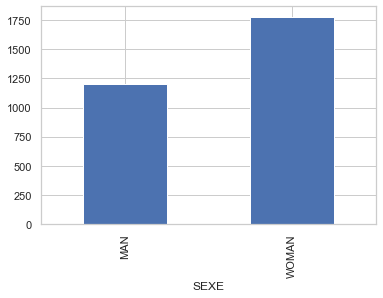

In [49]:
# GENDER
survey_65.groupby(['SEXE']).size().plot.bar()

In [50]:
display(pd.crosstab(data.SEXE, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
SEXE,,
MAN,822,134
WOMAN,1302,209


In [51]:
data_prep = {'WOMAN': 1,
            'MAN': 0}
data['Gender'] = [data_prep[i] for i in data['SEXE']]

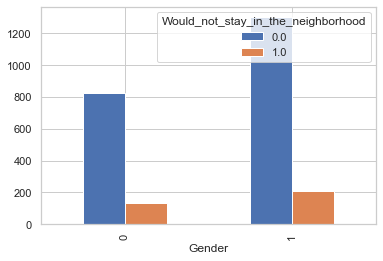

In [52]:
table = pd.crosstab(data.Gender, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

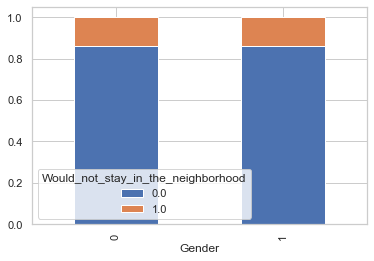

In [53]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

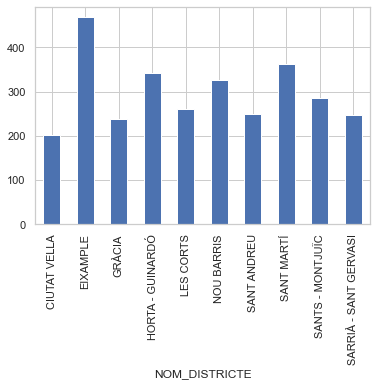

In [54]:
# DISTRICT
survey_65.groupby(['NOM_DISTRICTE']).size().plot.bar()

In [55]:
display(pd.crosstab(data.NOM_DISTRICTE , data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
NOM_DISTRICTE,,
CIUTAT VELLA,128,26
EIXAMPLE,365,41
GRÀCIA,170,26
HORTA - GUINARDÓ,243,45
LES CORTS,218,10
NOU BARRIS,189,62
SANT ANDREU,171,40
SANT MARTÍ,255,38
SANTS - MONTJUÏC,193,42


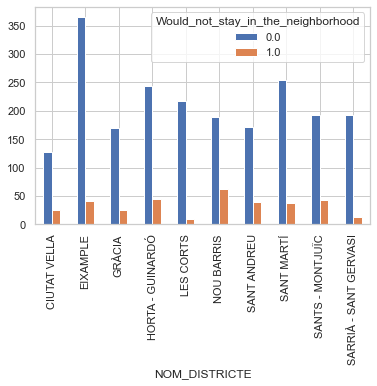

In [56]:
table = pd.crosstab(data.NOM_DISTRICTE, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

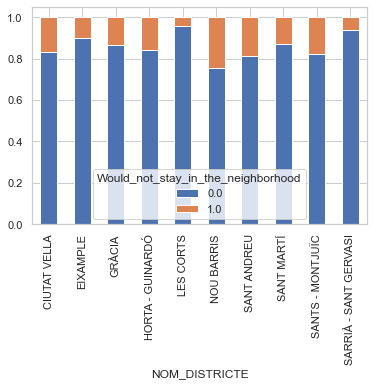

In [57]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

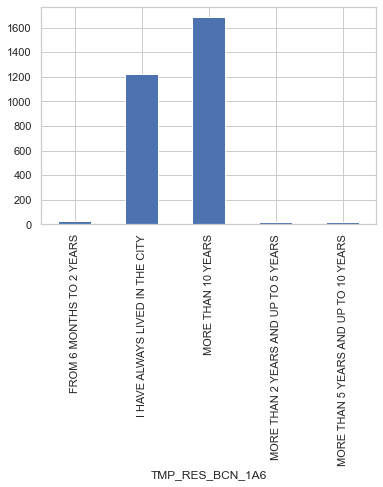

In [58]:
# HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?
survey_65.groupby(['TMP_RES_BCN_1A6']).size().plot.bar()

In [59]:
display(pd.crosstab(data.TMP_RES_BCN_1A6, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
TMP_RES_BCN_1A6,,
FROM 6 MONTHS TO 2 YEARS,15,8
I HAVE ALWAYS LIVED IN THE CITY,910,144
MORE THAN 10 YEARS,1171,184
MORE THAN 2 YEARS AND UP TO 5 YEARS,13,4
MORE THAN 5 YEARS AND UP TO 10 YEARS,15,3


In [60]:
data.TMP_RES_BCN_1A6.unique()

array(['MORE THAN 10 YEARS', 'I HAVE ALWAYS LIVED IN THE CITY',
       'FROM 6 MONTHS TO 2 YEARS', 'MORE THAN 2 YEARS AND UP TO 5 YEARS',
       'MORE THAN 5 YEARS AND UP TO 10 YEARS'], dtype=object)

In [61]:
data_prep = {'I HAVE ALWAYS LIVED IN THE CITY': 'I HAVE ALWAYS LIVED IN THE CITY',
             'MORE THAN 10 YEARS': 'MORE THAN 10 YEARS', 
             'MORE THAN 5 YEARS AND UP TO 10 YEARS': 'LESS THAN 10 YEARS',
             'MORE THAN 2 YEARS AND UP TO 5 YEARS': 'LESS THAN 10 YEARS', 
             'FROM 6 MONTHS TO 2 YEARS': 'LESS THAN 10 YEARS'}
data['Time_living_in_BCN'] = [data_prep[i] for i in data['TMP_RES_BCN_1A6']]

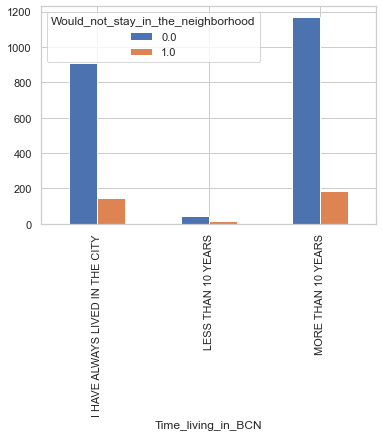

In [62]:
table = pd.crosstab(data.Time_living_in_BCN, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

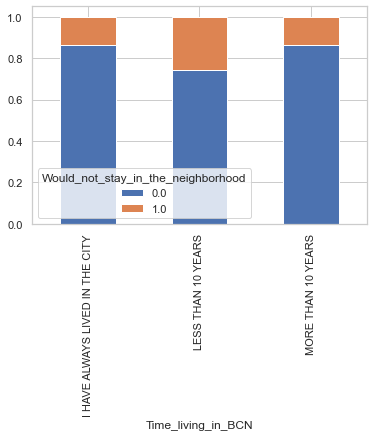

In [63]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

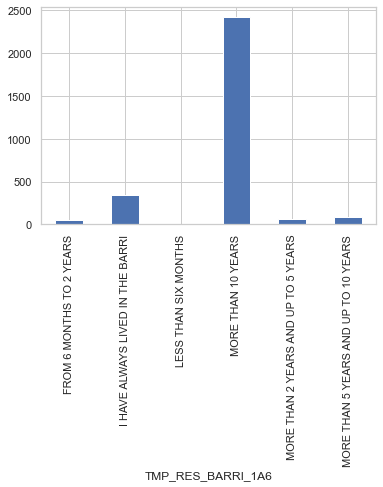

In [64]:
# HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?
survey_65.groupby(['TMP_RES_BARRI_1A6']).size().plot.bar()

In [65]:
display(pd.crosstab(data.TMP_RES_BARRI_1A6, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
TMP_RES_BARRI_1A6,,
FROM 6 MONTHS TO 2 YEARS,32,12
I HAVE ALWAYS LIVED IN THE BARRI,287,20
LESS THAN SIX MONTHS,6,2
MORE THAN 10 YEARS,1713,278
MORE THAN 2 YEARS AND UP TO 5 YEARS,31,15
MORE THAN 5 YEARS AND UP TO 10 YEARS,55,16


In [66]:
data.TMP_RES_BARRI_1A6.unique()

array(['MORE THAN 5 YEARS AND UP TO 10 YEARS', 'MORE THAN 10 YEARS',
       'I HAVE ALWAYS LIVED IN THE BARRI', 'FROM 6 MONTHS TO 2 YEARS',
       'MORE THAN 2 YEARS AND UP TO 5 YEARS', 'LESS THAN SIX MONTHS'],
      dtype=object)

In [67]:
data_prep = {'I HAVE ALWAYS LIVED IN THE BARRI': 'I HAVE ALWAYS LIVED IN THE CITY',
             'MORE THAN 10 YEARS': 'MORE THAN 10 YEARS', 
             'MORE THAN 5 YEARS AND UP TO 10 YEARS': 'LESS THAN 10 YEARS',
             'MORE THAN 2 YEARS AND UP TO 5 YEARS': 'LESS THAN 10 YEARS', 
             'FROM 6 MONTHS TO 2 YEARS': 'LESS THAN 10 YEARS',
             'LESS THAN SIX MONTHS': 'LESS THAN 10 YEARS'}
data['Time_living_in_barri'] = [data_prep[i] for i in data['TMP_RES_BARRI_1A6']]

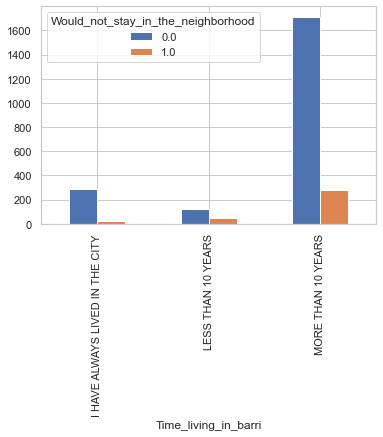

In [68]:
table = pd.crosstab(data.Time_living_in_barri, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

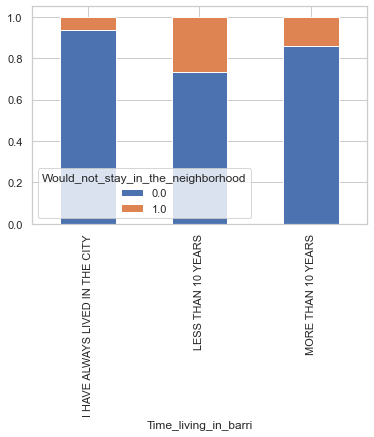

In [69]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

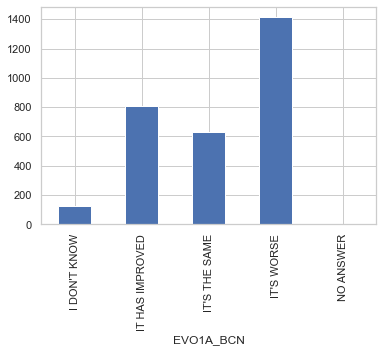

In [70]:
# DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?
survey_65.groupby(['EVO1A_BCN']).size().plot.bar()

In [71]:
display(pd.crosstab(data.EVO1A_BCN, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BCN,,
I DON'T KNOW,95,11
IT HAS IMPROVED,620,78
IT'S THE SAME,463,69
IT'S WORSE,944,184
NO ANSWER,2,1


In [72]:
data.EVO1A_BCN.unique()

array(["IT'S WORSE", 'IT HAS IMPROVED', "IT'S THE SAME", "I DON'T KNOW",
       'NO ANSWER'], dtype=object)

In [73]:
data_prep = {"IT'S WORSE": -1, 
             "IT'S THE SAME": 0, 
             'IT HAS IMPROVED': 1, 
             "I DON'T KNOW": 0,
             'NO ANSWER': 0}
data['BCN_if_has_improved'] = [data_prep[i] for i in data['EVO1A_BCN']]

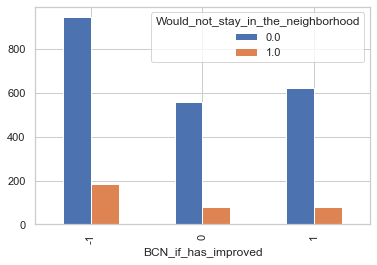

In [74]:
table = pd.crosstab(data.BCN_if_has_improved, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

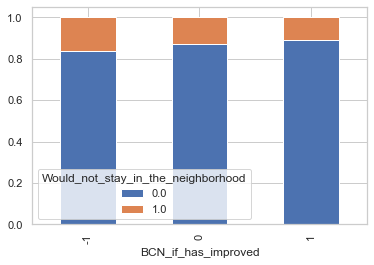

In [75]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

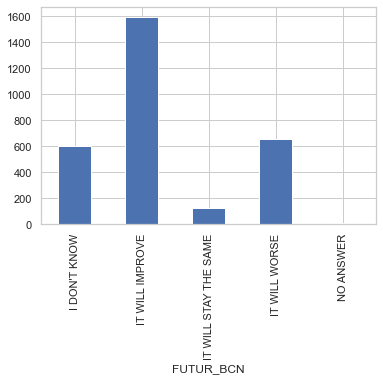

In [76]:
# FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?
survey_65.groupby(['FUTUR_BCN']).size().plot.bar()

In [77]:
display(pd.crosstab(data.FUTUR_BCN, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
FUTUR_BCN,,
I DON'T KNOW,427,62
IT WILL IMPROVE,1179,189
IT WILL STAY THE SAME,83,14
IT WILL WORSE,432,77
NO ANSWER,3,1


In [78]:
data.FUTUR_BCN.unique()

array(["I DON'T KNOW", 'IT WILL IMPROVE', 'IT WILL WORSE',
       'IT WILL STAY THE SAME', 'NO ANSWER'], dtype=object)

In [79]:
data_prep = {'IT WILL WORSE': -1, 
             'IT WILL IMPROVE': 1, 
             'IT WILL STAY THE SAME': 0,
             "I DON'T KNOW": 0, 
             'NO ANSWER': 0}
data['BCN_if_will_improve'] = [data_prep[i] for i in data['FUTUR_BCN']]

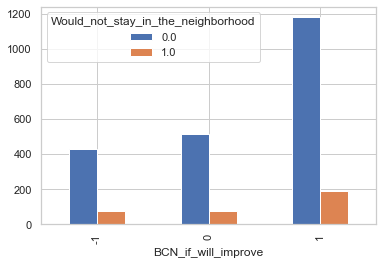

In [80]:
table = pd.crosstab(data.BCN_if_will_improve, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

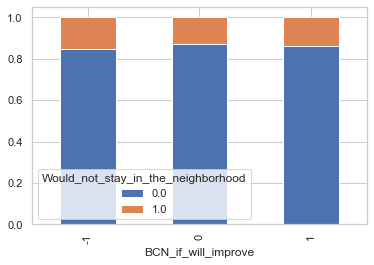

In [81]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

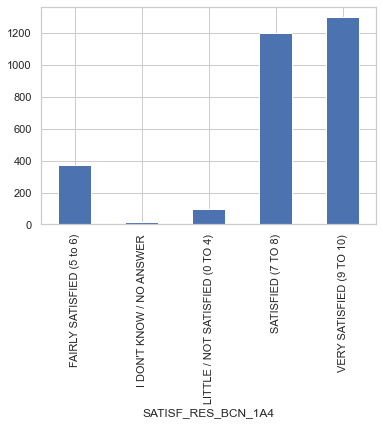

In [82]:
# ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA? - GROUPED
survey_65.groupby(['SATISF_RES_BCN_1A4']).size().plot.bar()

In [83]:
display(pd.crosstab(data.SATISF_RES_BCN_1A4, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
SATISF_RES_BCN_1A4,,
FAIRLY SATISFIED (5 to 6),205,42
I DON'T KNOW / NO ANSWER,10,3
LITTLE / NOT SATISFIED (0 TO 4),40,10
SATISFIED (7 TO 8),841,156
VERY SATISFIED (9 TO 10),1028,132


In [84]:
data.SATISF_RES_BCN_1A4.unique()

array(['VERY SATISFIED (9 TO 10)', 'SATISFIED (7 TO 8)',
       'FAIRLY SATISFIED (5 to 6)', 'LITTLE / NOT SATISFIED (0 TO 4)',
       "I DON'T KNOW / NO ANSWER"], dtype=object)

In [85]:
data_prep = {'SATISFIED (7 TO 8)': 3, 
             'VERY SATISFIED (9 TO 10)': 4,
             'FAIRLY SATISFIED (5 to 6)': 2, 
             'LITTLE / NOT SATISFIED (0 TO 4)': 1,
             "I DON'T KNOW / NO ANSWER": 0}
data['BCN_satisfaction_of_living'] = [data_prep[i] for i in data['SATISF_RES_BCN_1A4']]

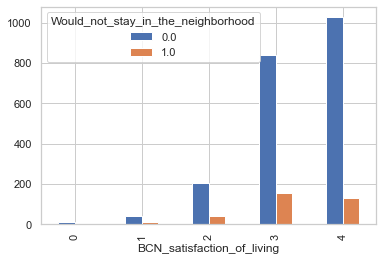

In [86]:
table = pd.crosstab(data.BCN_satisfaction_of_living, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

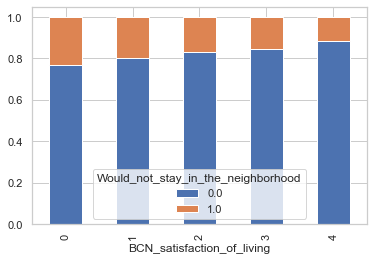

In [87]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

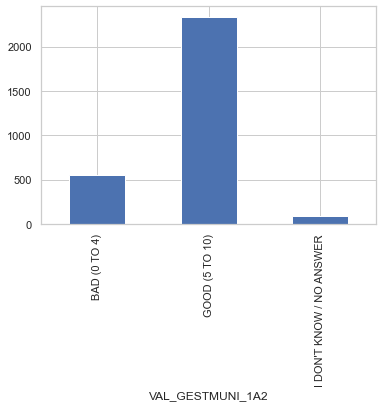

In [88]:
# ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL? - GROUPED
survey_65.groupby(['VAL_GESTMUNI_1A2']).size().plot.bar()

In [89]:
display(pd.crosstab(data.VAL_GESTMUNI_1A2, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GESTMUNI_1A2,,
BAD (0 TO 4),351,70
GOOD (5 TO 10),1710,266
I DON'T KNOW / NO ANSWER,63,7


In [90]:
data.VAL_GESTMUNI_1A2.unique()

array(['GOOD (5 TO 10)', 'BAD (0 TO 4)', "I DON'T KNOW / NO ANSWER"],
      dtype=object)

In [91]:
data_prep = {'GOOD (5 TO 10)': 1, 
             'BAD (0 TO 4)': -1,
             "I DON'T KNOW / NO ANSWER": 0}
data['BCN_city_management'] = [data_prep[i] for i in data['VAL_GESTMUNI_1A2']]

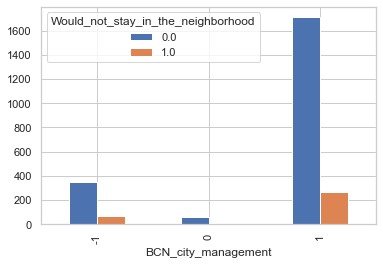

In [92]:
table = pd.crosstab(data.BCN_city_management, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

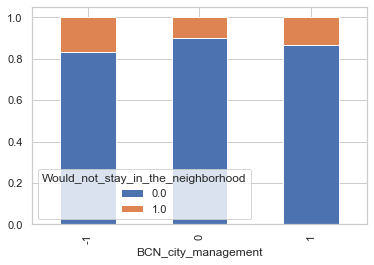

In [93]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

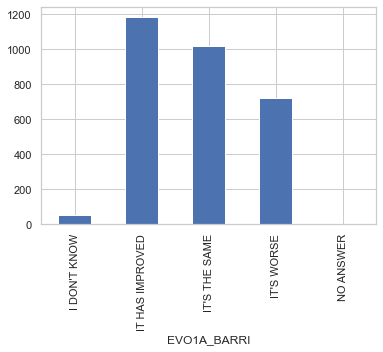

In [94]:
# IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?
survey_65.groupby(['EVO1A_BARRI']).size().plot.bar()

In [95]:
display(pd.crosstab(data.EVO1A_BARRI, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BARRI,,
I DON'T KNOW,33,7
IT HAS IMPROVED,906,114
IT'S THE SAME,749,109
IT'S WORSE,435,113
NO ANSWER,1,0


In [96]:
data.EVO1A_BARRI.unique()

array(["IT'S WORSE", "IT'S THE SAME", 'IT HAS IMPROVED', "I DON'T KNOW",
       'NO ANSWER'], dtype=object)

In [97]:
data_prep = {"IT'S WORSE": -1, 
             "IT'S THE SAME": 0, 
             'IT HAS IMPROVED': 1, 
             "I DON'T KNOW": 0,
             'NO ANSWER': 0}
data['Barri_if_has_improved'] = [data_prep[i] for i in data['EVO1A_BARRI']]

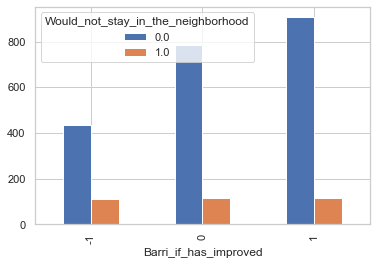

In [98]:
table = pd.crosstab(data.Barri_if_has_improved, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

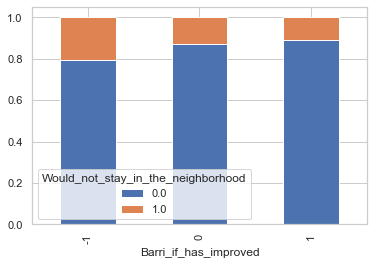

In [99]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

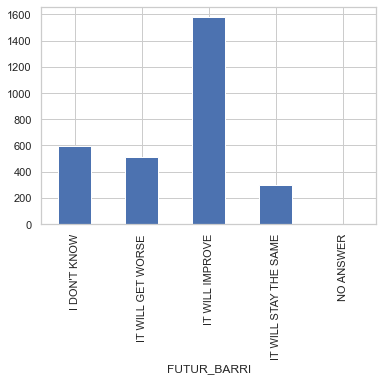

In [100]:
# AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE?
survey_65.groupby(['FUTUR_BARRI']).size().plot.bar()

In [101]:
display(pd.crosstab(data.FUTUR_BARRI, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
FUTUR_BARRI,,
I DON'T KNOW,411,69
IT WILL GET WORSE,308,74
IT WILL IMPROVE,1195,162
IT WILL STAY THE SAME,209,38
NO ANSWER,1,0


In [102]:
data.FUTUR_BARRI.unique()

array(["I DON'T KNOW", 'IT WILL IMPROVE', 'IT WILL GET WORSE',
       'IT WILL STAY THE SAME', 'NO ANSWER'], dtype=object)

In [103]:
data_prep = {'IT WILL GET WORSE': -1, 
             'IT WILL IMPROVE': 1, 
             'IT WILL STAY THE SAME': 0,
             "I DON'T KNOW": 0, 
             'NO ANSWER': 0}
data['Barri_if_will_improve'] = [data_prep[i] for i in data['FUTUR_BARRI']]

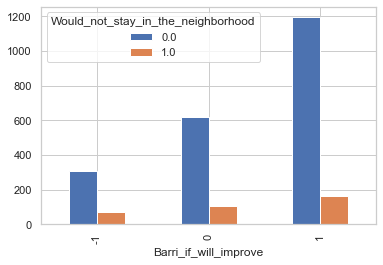

In [104]:
table = pd.crosstab(data.Barri_if_will_improve, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

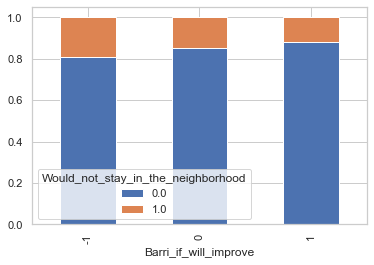

In [105]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

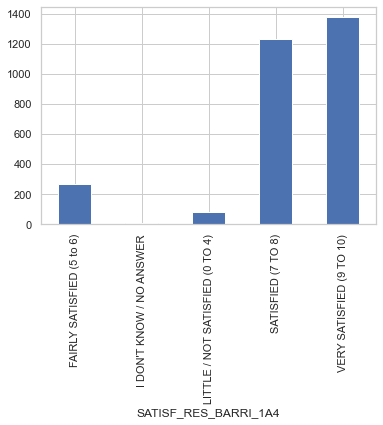

In [106]:
# ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD? - GROUPED
survey_65.groupby(['SATISF_RES_BARRI_1A4']).size().plot.bar()

In [107]:
display(pd.crosstab(data.SATISF_RES_BARRI_1A4, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
SATISF_RES_BARRI_1A4,,
FAIRLY SATISFIED (5 to 6),125,46
I DON'T KNOW / NO ANSWER,6,4
LITTLE / NOT SATISFIED (0 TO 4),16,26
SATISFIED (7 TO 8),830,175
VERY SATISFIED (9 TO 10),1147,92


In [108]:
data.SATISF_RES_BARRI_1A4.unique()

array(["I DON'T KNOW / NO ANSWER", 'SATISFIED (7 TO 8)',
       'LITTLE / NOT SATISFIED (0 TO 4)', 'FAIRLY SATISFIED (5 to 6)',
       'VERY SATISFIED (9 TO 10)'], dtype=object)

In [109]:
data_prep = {'SATISFIED (7 TO 8)': 3, 
             'VERY SATISFIED (9 TO 10)': 4,
             'FAIRLY SATISFIED (5 to 6)': 2, 
             'LITTLE / NOT SATISFIED (0 TO 4)': 1,
             "I DON'T KNOW / NO ANSWER": 0}
data['Barri_satisfaction_of_living'] = [data_prep[i] for i in data['SATISF_RES_BARRI_1A4']]

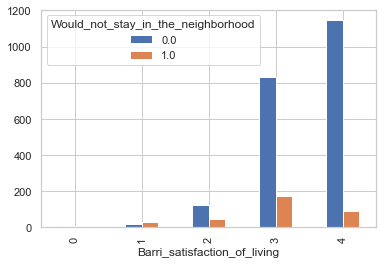

In [110]:
table = pd.crosstab(data.Barri_satisfaction_of_living, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

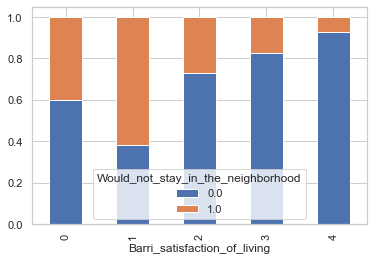

In [111]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

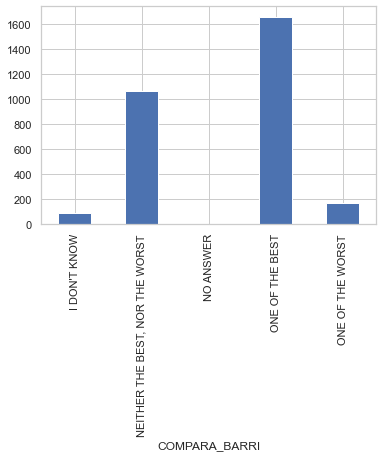

In [112]:
# DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?
survey_65.groupby(['COMPARA_BARRI']).size().plot.bar()

In [113]:
display(pd.crosstab(data.COMPARA_BARRI, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
COMPARA_BARRI,,
I DON'T KNOW,59,14
"NEITHER THE BEST, NOR THE WORST",643,189
NO ANSWER,2,0
ONE OF THE BEST,1364,90
ONE OF THE WORST,56,50


In [114]:
data.COMPARA_BARRI.unique()

array(['NEITHER THE BEST, NOR THE WORST', 'ONE OF THE BEST',
       'ONE OF THE WORST', "I DON'T KNOW", 'NO ANSWER'], dtype=object)

In [115]:
data_prep = {'NEITHER THE BEST, NOR THE WORST': 0, 
             'ONE OF THE BEST': 1,
             'ONE OF THE WORST': -1, 
             "I DON'T KNOW": 0, 
             'NO ANSWER': 0}
data['Barri_comparison'] = [data_prep[i] for i in data['COMPARA_BARRI']]

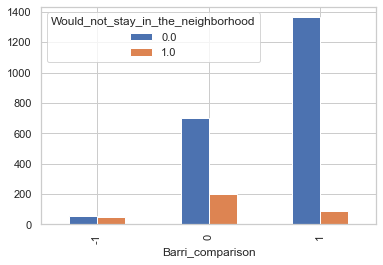

In [116]:
table = pd.crosstab(data.Barri_comparison, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

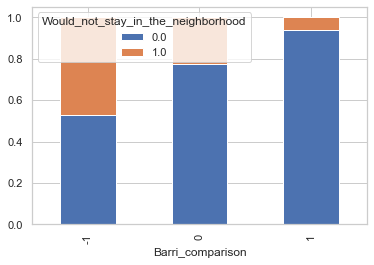

In [117]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

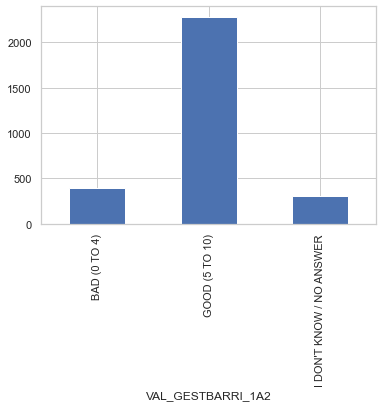

In [118]:
# ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD? - GROUPED
survey_65.groupby(['VAL_GESTBARRI_1A2']).size().plot.bar()

In [119]:
display(pd.crosstab(data.VAL_GESTBARRI_1A2, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GESTBARRI_1A2,,
BAD (0 TO 4),230,57
GOOD (5 TO 10),1685,254
I DON'T KNOW / NO ANSWER,209,32


In [120]:
data.VAL_GESTBARRI_1A2.unique()

array(["I DON'T KNOW / NO ANSWER", 'GOOD (5 TO 10)', 'BAD (0 TO 4)'],
      dtype=object)

In [121]:
data_prep = {'GOOD (5 TO 10)': 1, 
             'BAD (0 TO 4)': -1,
             "I DON'T KNOW / NO ANSWER": 0}
data['Barri_city_management'] = [data_prep[i] for i in data['VAL_GESTBARRI_1A2']]

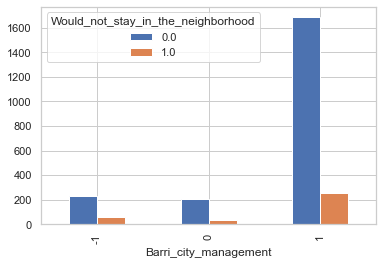

In [122]:
table = pd.crosstab(data.Barri_city_management, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

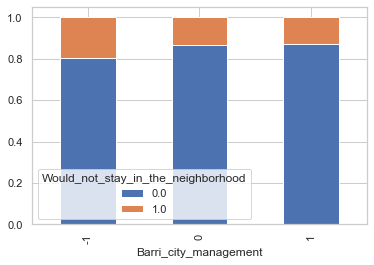

In [123]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [124]:
survey_65.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'NOM_BARRI',
 'GRANBARRI',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_0A10',
 'SATISF_RES_BCN_1A4',
 'VAL_GESTMUNI',
 'VAL_GESTMUNI_1A2',
 'VAL_ESCOMBRARIES',
 'VAL_NETEJA',
 'VAL_SOROLL',
 'VAL_VERD',
 'VAL_ENLLUM',
 'VAL_URBA',
 'VAL_ASFALT',
 'VAL_FACANES',
 'VAL_CIRCUL',
 'VAL_APARCA',
 'VAL_BUS',
 'VAL_METRO',
 'VAL_TRAM',
 'VAL_BICING',
 'VAL_GUB',
 'VAL_SPEIS',
 'VAL_SEGUR',
 'VAL_SEGUR_BARRI',
 'VAL_ESPORT',
 'VAL_SIAC',
 'VAL_CSS',
 'VAL_CULT',
 'VAL_FESTESPOP',
 'VAL_MERCAT',
 'VAL_BIBLIO',
 'VAL_CC',
 'VAL_ESCOMBRARIES_1A2',
 'VAL_NETEJA_1A2',
 'VAL_SOROLL_1A2',
 'VAL_VERD_1A2',
 'VAL_ENLLUM_1A2',
 'VAL_URBA_1A2',
 'VAL_ASFALT_1A2',
 'VAL_FACANES_1A2',
 'VAL_CIRCUL_1A2',
 'VAL_APARCA_1A2',
 'VAL_BUS_1A2',
 'VAL_METRO_1A2',
 'VAL_TRAM_1A2',
 'VAL_BICING_1A2',
 'VAL_GUB_1A2',
 'VAL_SPEIS_1A2',
 'VAL_SEGUR_1A2',
 'VAL_SEGUR_BARRI_1A2',
 'VAL_ESPORT_1A2',
 'VAL_SIAC_

In [125]:
for x in ['VAL_ESCOMBRARIES_1A2', 'VAL_NETEJA_1A2', 'VAL_SOROLL_1A2', 'VAL_VERD_1A2', 'VAL_ENLLUM_1A2', 
          'VAL_URBA_1A2', 'VAL_ASFALT_1A2', 'VAL_FACANES_1A2', 'VAL_CIRCUL_1A2', 'VAL_APARCA_1A2', 
          'VAL_BUS_1A2', 'VAL_METRO_1A2', 'VAL_TRAM_1A2', 'VAL_BICING_1A2', 'VAL_GUB_1A2', 'VAL_SPEIS_1A2',
          'VAL_SEGUR_1A2', 'VAL_SEGUR_BARRI_1A2', 'VAL_ESPORT_1A2', 'VAL_SIAC_1A2', 'VAL_CSS_1A2', 'VAL_CULT_1A2', 
          'VAL_FESTESPOP_1A2', 'VAL_MERCAT_1A2', 'VAL_BIBLIO_1A2', 'VAL_CC_1A2']:
    display(pd.crosstab(data[x], data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ESCOMBRARIES_1A2,,
BAD (0 TO 4),119,25
GOOD (5 TO 10),1996,315
I DON'T KNOW / NO ANSWER,9,3


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_NETEJA_1A2,,
BAD (0 TO 4),338,76
GOOD (5 TO 10),1775,267
I DON'T KNOW / NO ANSWER,11,0


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SOROLL_1A2,,
BAD (0 TO 4),452,110
GOOD (5 TO 10),1547,219
I DON'T KNOW / NO ANSWER,125,14


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_VERD_1A2,,
BAD (0 TO 4),322,72
GOOD (5 TO 10),1668,254
I DON'T KNOW / NO ANSWER,134,17


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ENLLUM_1A2,,
BAD (0 TO 4),171,41
GOOD (5 TO 10),1891,293
I DON'T KNOW / NO ANSWER,62,9


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_URBA_1A2,,
BAD (0 TO 4),236,52
GOOD (5 TO 10),1555,241
I DON'T KNOW / NO ANSWER,333,50


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ASFALT_1A2,,
BAD (0 TO 4),450,82
GOOD (5 TO 10),1629,260
I DON'T KNOW / NO ANSWER,45,1


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_FACANES_1A2,,
BAD (0 TO 4),188,33
GOOD (5 TO 10),1681,278
I DON'T KNOW / NO ANSWER,255,32


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CIRCUL_1A2,,
BAD (0 TO 4),557,91
GOOD (5 TO 10),1426,229
I DON'T KNOW / NO ANSWER,141,23


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_APARCA_1A2,,
BAD (0 TO 4),968,163
GOOD (5 TO 10),762,107
I DON'T KNOW / NO ANSWER,394,73


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_BUS_1A2,,
BAD (0 TO 4),220,45
GOOD (5 TO 10),1758,283
I DON'T KNOW / NO ANSWER,146,15


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_METRO_1A2,,
BAD (0 TO 4),52,12
GOOD (5 TO 10),1755,295
I DON'T KNOW / NO ANSWER,317,36


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_TRAM_1A2,,
BAD (0 TO 4),46,13
GOOD (5 TO 10),730,128
I DON'T KNOW / NO ANSWER,1348,202


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_BICING_1A2,,
BAD (0 TO 4),316,50
GOOD (5 TO 10),701,117
I DON'T KNOW / NO ANSWER,1107,176


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GUB_1A2,,
BAD (0 TO 4),310,70
GOOD (5 TO 10),1454,235
I DON'T KNOW / NO ANSWER,360,38


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SPEIS_1A2,,
BAD (0 TO 4),23,8
GOOD (5 TO 10),1463,240
I DON'T KNOW / NO ANSWER,638,95


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SEGUR_1A2,,
BAD (0 TO 4),560,115
GOOD (5 TO 10),1407,204
I DON'T KNOW / NO ANSWER,157,24


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SEGUR_BARRI_1A2,,
BAD (0 TO 4),430,108
GOOD (5 TO 10),1635,226
I DON'T KNOW / NO ANSWER,59,9


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ESPORT_1A2,,
BAD (0 TO 4),169,48
GOOD (5 TO 10),1032,171
I DON'T KNOW / NO ANSWER,923,124


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SIAC_1A2,,
BAD (0 TO 4),126,28
GOOD (5 TO 10),1389,223
I DON'T KNOW / NO ANSWER,609,92


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CSS_1A2,,
BAD (0 TO 4),131,25
GOOD (5 TO 10),1043,182
I DON'T KNOW / NO ANSWER,950,136


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CULT_1A2,,
BAD (0 TO 4),54,24
GOOD (5 TO 10),1280,213
I DON'T KNOW / NO ANSWER,790,106


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_FESTESPOP_1A2,,
BAD (0 TO 4),138,28
GOOD (5 TO 10),1403,218
I DON'T KNOW / NO ANSWER,583,97


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_MERCAT_1A2,,
BAD (0 TO 4),129,31
GOOD (5 TO 10),1771,279
I DON'T KNOW / NO ANSWER,224,33


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_BIBLIO_1A2,,
BAD (0 TO 4),36,4
GOOD (5 TO 10),1202,213
I DON'T KNOW / NO ANSWER,886,126


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CC_1A2,,
BAD (0 TO 4),38,14
GOOD (5 TO 10),1133,169
I DON'T KNOW / NO ANSWER,953,160


VAL_APARCA_1A2, VAL_ESPORT_1A2, VAL_SIAC_1A2, VAL_TRAM_1A2, VAL_BICING_1A2, VAL_SPEIS_1A2, VAL_CSS_1A2, VAL_CULT_1A2, VAL_FESTESPOP_1A2, VAL_BIBLIO_1A2, VAL_CC_1A2	- too many I DON'T KNOW / NO ANSWER values

In [126]:
data_prep = {'GOOD (5 TO 10)': 1, 
             'BAD (0 TO 4)': -1,
            "I DON'T KNOW / NO ANSWER": 0}
for x in ['VAL_ESCOMBRARIES_1A2', 'VAL_NETEJA_1A2', 'VAL_SOROLL_1A2', 'VAL_VERD_1A2', 'VAL_ENLLUM_1A2', 
          'VAL_URBA_1A2', 'VAL_ASFALT_1A2', 'VAL_FACANES_1A2', 'VAL_CIRCUL_1A2', 
          'VAL_BUS_1A2', 'VAL_METRO_1A2', 'VAL_GUB_1A2', 'VAL_SEGUR_1A2', 'VAL_SEGUR_BARRI_1A2', 'VAL_MERCAT_1A2']:
    data[questions_dict[x][22:][:-10]] = [data_prep[i] for i in data[x]]

C:\Users\THINK\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


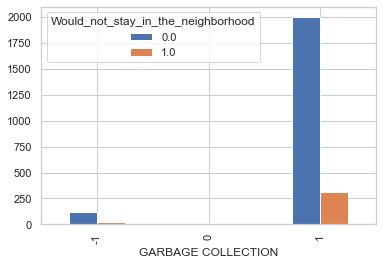

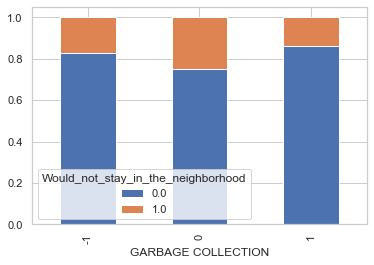

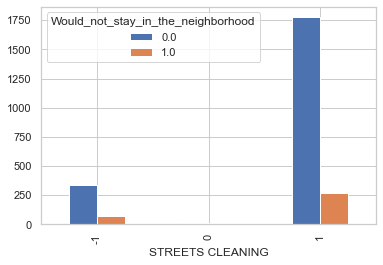

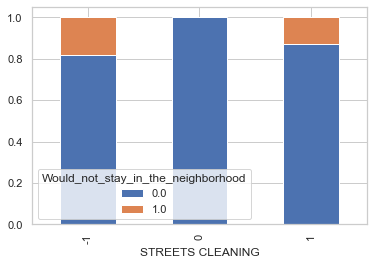

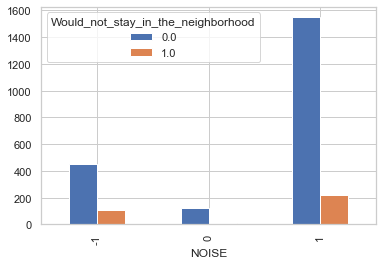

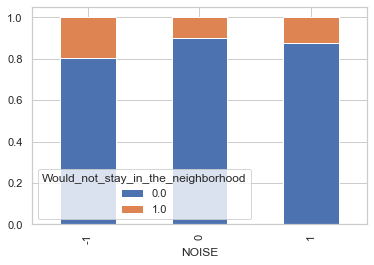

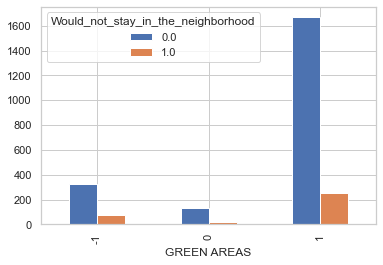

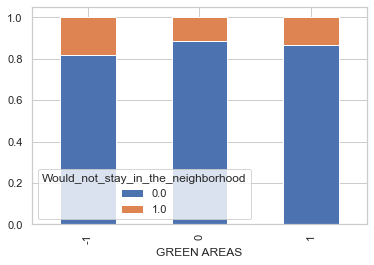

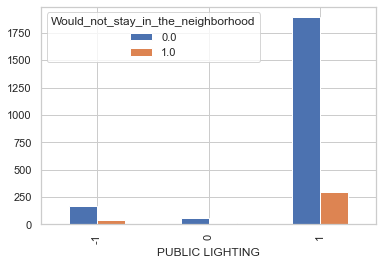

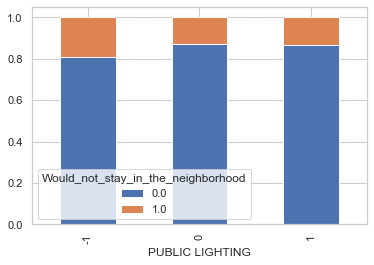

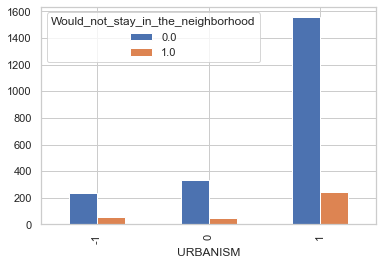

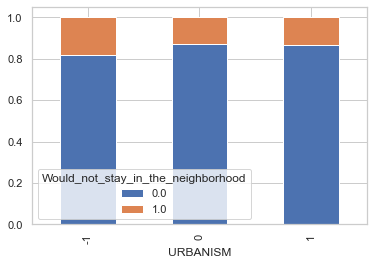

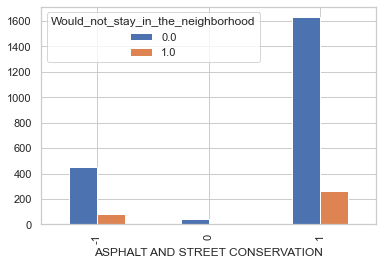

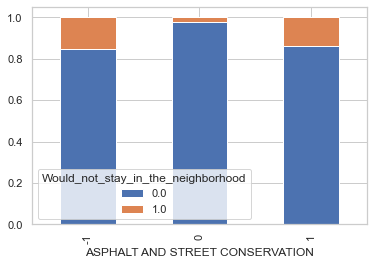

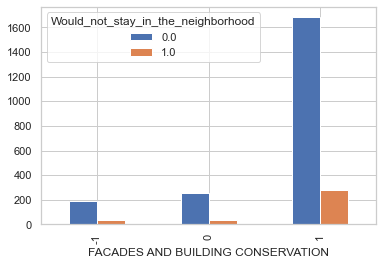

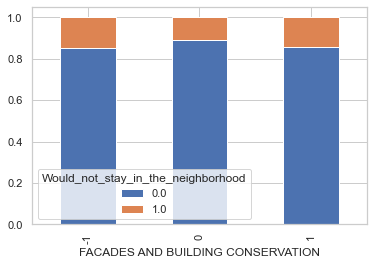

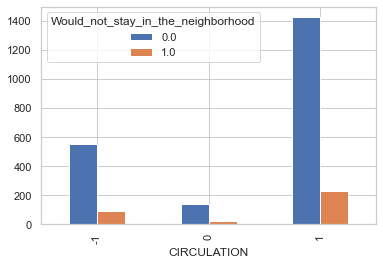

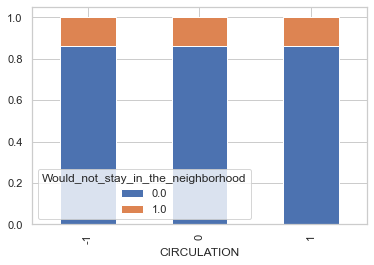

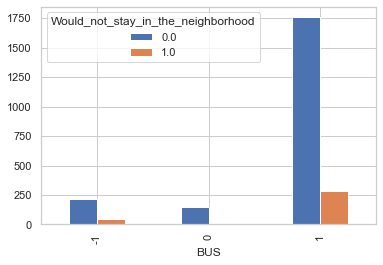

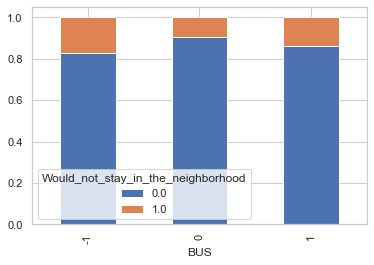

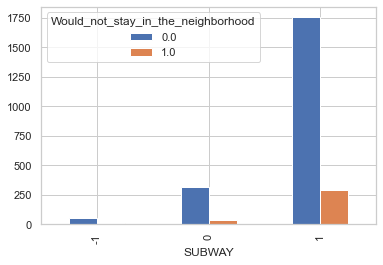

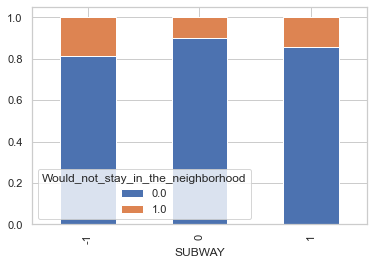

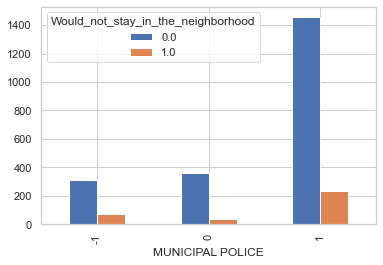

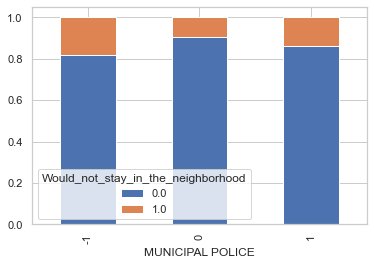

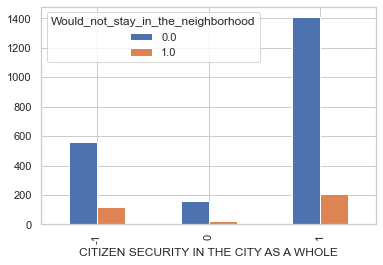

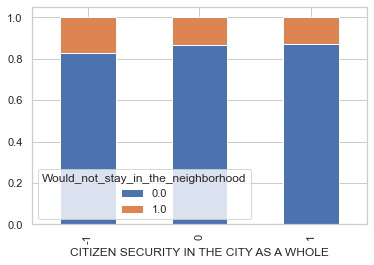

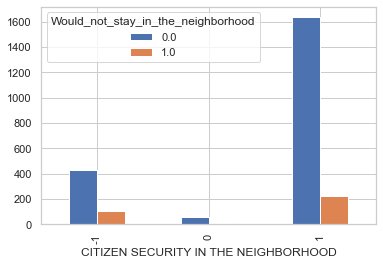

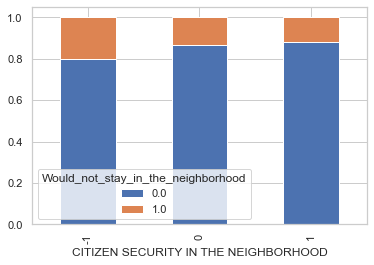

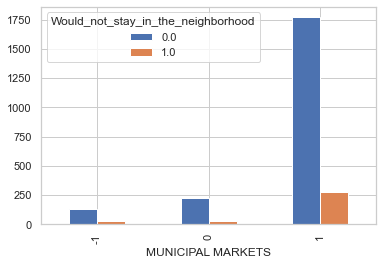

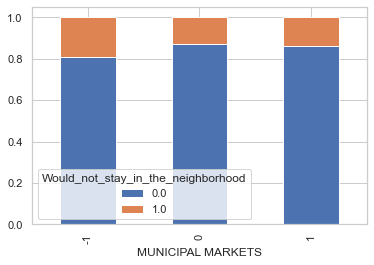

In [127]:
for x in ['VAL_ESCOMBRARIES_1A2', 'VAL_NETEJA_1A2', 'VAL_SOROLL_1A2', 'VAL_VERD_1A2', 'VAL_ENLLUM_1A2', 
          'VAL_URBA_1A2', 'VAL_ASFALT_1A2', 'VAL_FACANES_1A2', 'VAL_CIRCUL_1A2', 
          'VAL_BUS_1A2', 'VAL_METRO_1A2', 'VAL_GUB_1A2', 'VAL_SEGUR_1A2', 'VAL_SEGUR_BARRI_1A2', 'VAL_MERCAT_1A2']:
    table = pd.crosstab(data[questions_dict[x][22:][:-10]], data.Would_not_stay_in_the_neighborhood)
    table.plot(kind='bar')
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

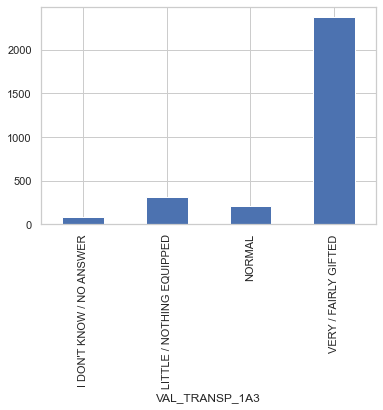

In [128]:
# IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY? - GROUPED
survey_65.groupby(['VAL_TRANSP_1A3']).size().plot.bar()

In [129]:
display(pd.crosstab(data.VAL_TRANSP_1A3, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_TRANSP_1A3,,
I DON'T KNOW / NO ANSWER,64,13
LITTLE / NOTHING EQUIPPED,207,38
NORMAL,146,19
VERY / FAIRLY GIFTED,1707,273


In [130]:
data.VAL_TRANSP_1A3.unique()

array(['VERY / FAIRLY GIFTED', 'LITTLE / NOTHING EQUIPPED', 'NORMAL',
       "I DON'T KNOW / NO ANSWER"], dtype=object)

In [131]:
data_prep = {'VERY / FAIRLY GIFTED': 1, 
             'NORMAL': 0, 
             'LITTLE / NOTHING EQUIPPED': -1,
             "I DON'T KNOW / NO ANSWER": 0}
data['BCN_transport'] = [data_prep[i] for i in data['VAL_TRANSP_1A3']]

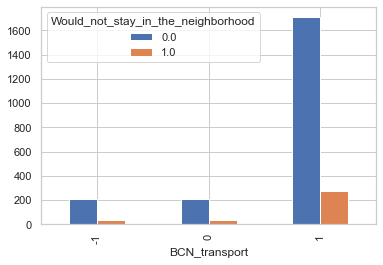

In [132]:
table = pd.crosstab(data.BCN_transport, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

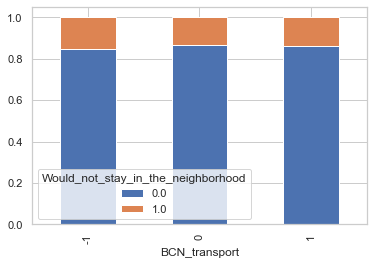

In [133]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

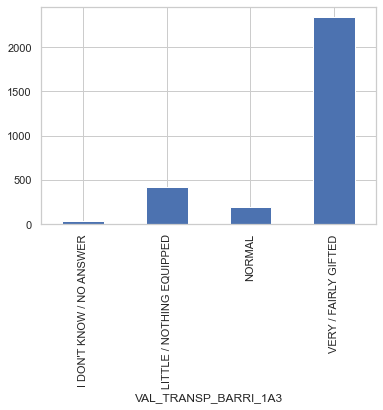

In [134]:
# IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY? - GROUPED
survey_65.groupby(['VAL_TRANSP_BARRI_1A3']).size().plot.bar()

In [135]:
display(pd.crosstab(data.VAL_TRANSP_BARRI_1A3, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_TRANSP_BARRI_1A3,,
I DON'T KNOW / NO ANSWER,23,3
LITTLE / NOTHING EQUIPPED,298,48
NORMAL,121,29
VERY / FAIRLY GIFTED,1682,263


In [136]:
data.VAL_TRANSP_BARRI_1A3.unique()

array(["I DON'T KNOW / NO ANSWER", 'VERY / FAIRLY GIFTED',
       'LITTLE / NOTHING EQUIPPED', 'NORMAL'], dtype=object)

In [137]:
data_prep = {'VERY / FAIRLY GIFTED': 1, 
             'NORMAL': 0, 
             'LITTLE / NOTHING EQUIPPED': -1,
             "I DON'T KNOW / NO ANSWER": 0}
data['Barri_transport'] = [data_prep[i] for i in data['VAL_TRANSP_BARRI_1A3']]

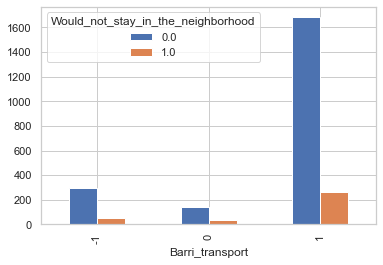

In [138]:
table = pd.crosstab(data.Barri_transport, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

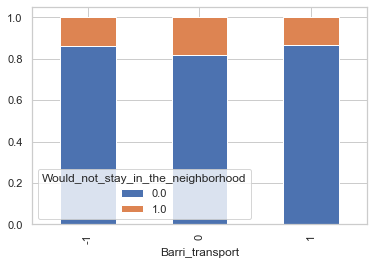

In [139]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

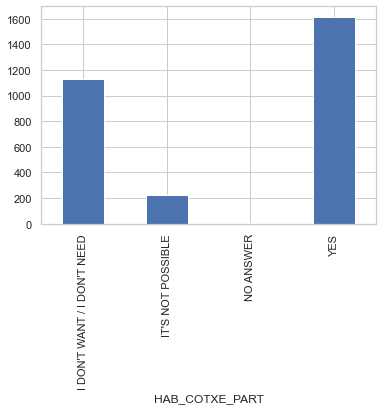

In [140]:
# DO YOU HAVE: PRIVATE CAR
survey_65.groupby(['HAB_COTXE_PART']).size().plot.bar()

In [141]:
display(pd.crosstab(data.HAB_COTXE_PART, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_COTXE_PART,,
I DON'T WANT / I DON'T NEED,848,136
IT'S NOT POSSIBLE,151,32
NO ANSWER,6,2
YES,1119,173


In [142]:
data.HAB_COTXE_PART.unique()

array(["I DON'T WANT / I DON'T NEED", "IT'S NOT POSSIBLE", 'YES',
       'NO ANSWER'], dtype=object)

In [143]:
data_prep = {'NO': 0, 
             'YES': 1, 
             'NO ANSWER': 0, 
             "I DON'T KNOW": 0,
             "I DON'T WANT / I DON'T NEED": 0, 
             "IT'S NOT POSSIBLE": 0}
data['Owns_a_car'] = [data_prep[i] for i in data['HAB_COTXE_PART']]

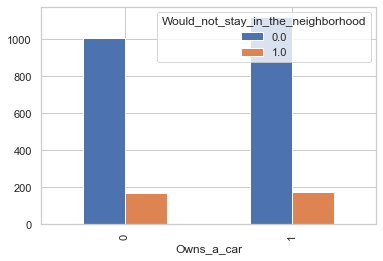

In [144]:
table = pd.crosstab(data.Owns_a_car, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

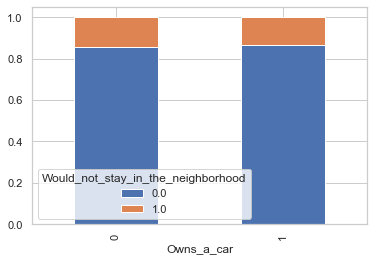

In [145]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

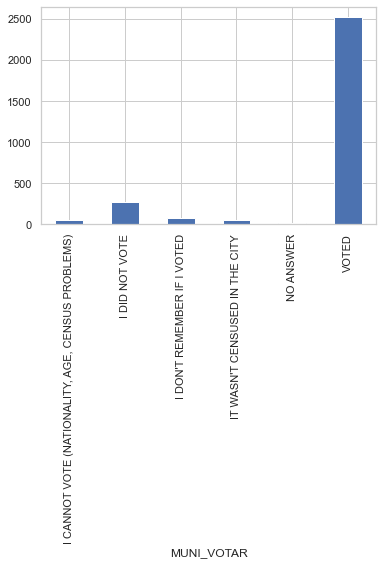

In [146]:
# HAVE YOU VOTED IN THE LAST MUNICIPAL ELECTIONS?
survey_65.groupby(['MUNI_VOTAR']).size().plot.bar()

In [147]:
display(pd.crosstab(data.MUNI_VOTAR, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
MUNI_VOTAR,,
"I CANNOT VOTE (NATIONALITY, AGE, CENSUS PROBLEMS)",36,10
I DID NOT VOTE,187,30
I DON'T REMEMBER IF I VOTED,55,8
IT WASN'T CENSUSED IN THE CITY,25,7
NO ANSWER,9,0
VOTED,1812,288


In [148]:
data.MUNI_VOTAR.unique()

array(['VOTED', 'I DID NOT VOTE', "I DON'T REMEMBER IF I VOTED",
       'I CANNOT VOTE (NATIONALITY, AGE, CENSUS PROBLEMS)',
       "IT WASN'T CENSUSED IN THE CITY", 'NO ANSWER'], dtype=object)

In [149]:
data_prep = {'VOTED': 1, 
             'I DID NOT VOTE': 0, 
             'NO ANSWER': 0,
             'I CANNOT VOTE (NATIONALITY, AGE, CENSUS PROBLEMS)': 0,
             "IT WASN'T CENSUSED IN THE CITY": 0, 
             "I DON'T REMEMBER IF I VOTED": 0} 
data['Voted'] = [data_prep[i] for i in data['MUNI_VOTAR']]

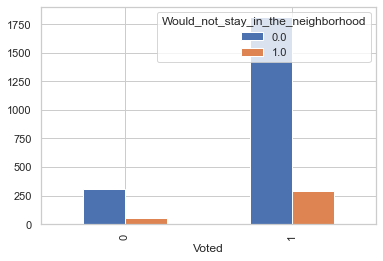

In [150]:
table = pd.crosstab(data.Voted, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

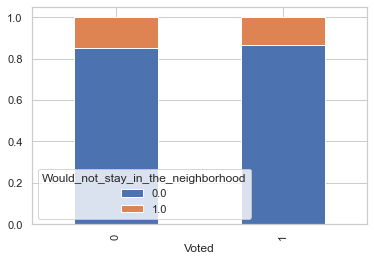

In [151]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

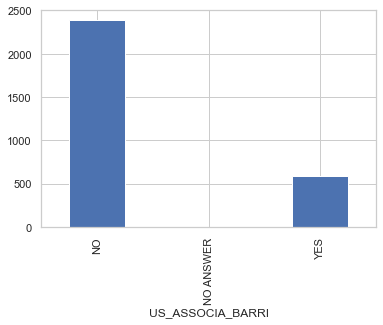

In [152]:
# DO YOU PARTICIPATE IN ANY ASSOCIATION OR ENTITY IN YOUR NEIGHBORHOOD?
survey_65.groupby(['US_ASSOCIA_BARRI']).size().plot.bar()

In [153]:
display(pd.crosstab(data.US_ASSOCIA_BARRI, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
US_ASSOCIA_BARRI,,
NO,1677,286
NO ANSWER,0,1
YES,447,56


In [154]:
data.US_ASSOCIA_BARRI.unique()

array(['NO', 'YES', 'NO ANSWER'], dtype=object)

In [155]:
data_prep = {'NO': 0, 
             'YES': 1, 
             'NO ANSWER': 0} 
data['Participate_in_association_in_barri'] = [data_prep[i] for i in data['US_ASSOCIA_BARRI']]

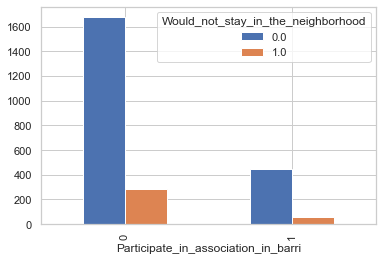

In [156]:
table = pd.crosstab(data.Participate_in_association_in_barri, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

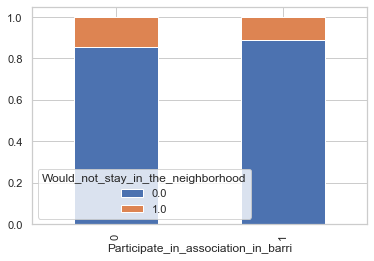

In [157]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

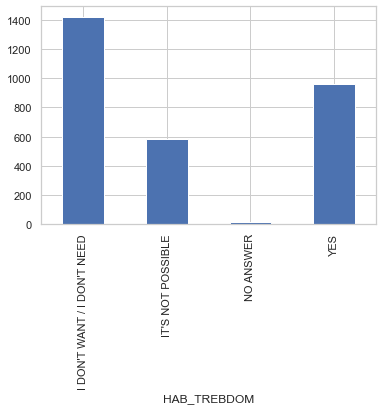

In [158]:
# DO YOU HAVE: REMUNERATED PERSON TO HELP WITH HOMEWORK OR FAMILY CARE
survey_65.groupby(['HAB_TREBDOM']).size().plot.bar()

In [159]:
display(pd.crosstab(data.HAB_TREBDOM, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_TREBDOM,,
I DON'T WANT / I DON'T NEED,982,164
IT'S NOT POSSIBLE,392,76
NO ANSWER,6,2
YES,744,101


In [160]:
data.HAB_TREBDOM.unique()

array(["IT'S NOT POSSIBLE", 'YES', "I DON'T WANT / I DON'T NEED",
       'NO ANSWER'], dtype=object)

In [161]:
data_prep = {'NO': 0, 
             'YES': 1, 
             'NO ANSWER': 0, 
             "I DON'T WANT / I DON'T NEED": 0, 
             "IT'S NOT POSSIBLE": 0}
data['Person_to_help_with_housework'] = [data_prep[i] for i in data['HAB_TREBDOM']]

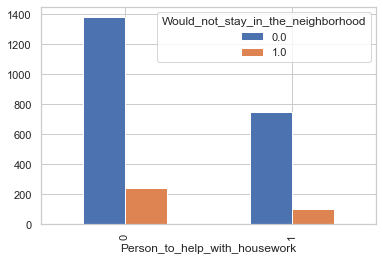

In [162]:
table = pd.crosstab(data.Person_to_help_with_housework, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

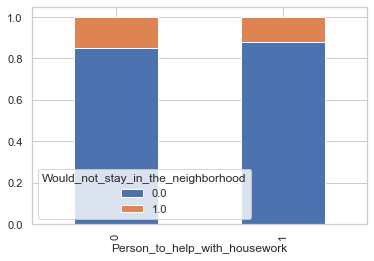

In [163]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

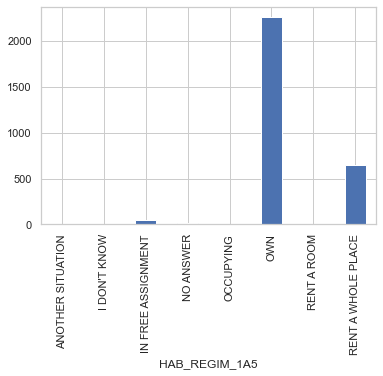

In [164]:
# DO YOU OWN OR DO YOU RENT YOUR HOUSE/FLAT/ROOM?
survey_65.groupby(['HAB_REGIM_1A5']).size().plot.bar()

In [165]:
display(pd.crosstab(data.HAB_REGIM_1A5, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_REGIM_1A5,,
ANOTHER SITUATION,2,0
I DON'T KNOW,2,0
IN FREE ASSIGNMENT,26,8
NO ANSWER,15,1
OCCUPYING,1,0
OWN,1628,261
RENT A ROOM,1,0
RENT A WHOLE PLACE,449,73


In [166]:
data.HAB_REGIM_1A5.unique()

array(['RENT A WHOLE PLACE', 'OWN', 'IN FREE ASSIGNMENT', 'NO ANSWER',
       "I DON'T KNOW", 'OCCUPYING', 'RENT A ROOM', 'ANOTHER SITUATION'],
      dtype=object)

In [167]:
data_prep = {'RENT A WHOLE PLACE': "RENT", 
             'OWN': "OWN", 
             'IN FREE ASSIGNMENT': np.nan, # nie wiem, co to znaczy 
             'NO ANSWER': np.nan,
             "I DON'T KNOW": np.nan, 
             'OCCUPYING': np.nan, 
             'RENT A ROOM': "RENT", 
             'ANOTHER SITUATION': np.nan}
data['House_contract'] = [data_prep[i] for i in data['HAB_REGIM_1A5']]

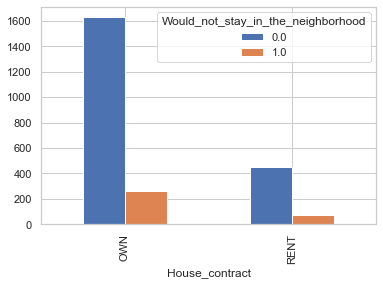

In [168]:
table = pd.crosstab(data.House_contract, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

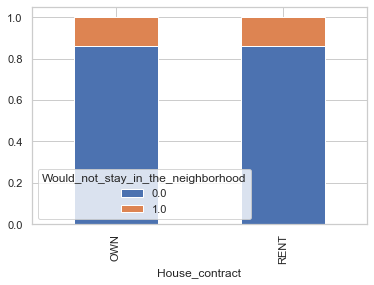

In [169]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

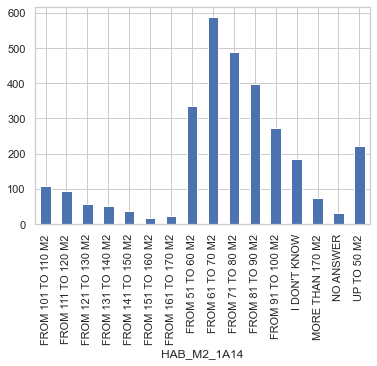

In [170]:
# HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED
survey_65.groupby(['HAB_M2_1A14']).size().plot.bar()

In [171]:
display(pd.crosstab(data.HAB_M2_1A14, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_M2_1A14,,
FROM 101 TO 110 M2,79,10
FROM 111 TO 120 M2,70,5
FROM 121 TO 130 M2,42,7
FROM 131 TO 140 M2,38,3
FROM 141 TO 150 M2,28,3
FROM 151 TO 160 M2,14,1
FROM 161 TO 170 M2,18,2
FROM 51 TO 60 M2,247,40
FROM 61 TO 70 M2,394,76


In [172]:
data.HAB_M2_1A14.unique()

array(["I DON'T KNOW", 'FROM 51 TO 60 M2', 'FROM 101 TO 110 M2',
       'MORE THAN 170 M2', 'FROM 71 TO 80 M2', 'FROM 61 TO 70 M2',
       'UP TO 50 M2', 'FROM 111 TO 120 M2', 'FROM 121 TO 130 M2',
       'FROM 81 TO 90 M2', 'FROM 141 TO 150 M2', 'FROM 91 TO 100 M2',
       'FROM 131 TO 140 M2', 'NO ANSWER', 'FROM 161 TO 170 M2',
       'FROM 151 TO 160 M2'], dtype=object)

In [173]:
data_prep = {'UP TO 50 M2': '< 50 M2', 
             'FROM 51 TO 60 M2': '51-100 M2', 
             'FROM 61 TO 70 M2': '51-100 M2', 
             'FROM 71 TO 80 M2': '51-100 M2', 
             'FROM 81 TO 90 M2': '51-100 M2', 
             'FROM 91 TO 100 M2': '51-100 M2', 
             'FROM 101 TO 120 M2': '101-150 M2', 
             'FROM 101 TO 110 M2': '101-150 M2',
             'FROM 111 TO 120 M2': '101-150 M2', 
             'FROM 121 TO 150 M2': '101-150 M2', 
             'FROM 121 TO 130 M2': '101-150 M2',
             'FROM 131 TO 140 M2': '101-150 M2', 
             'FROM 141 TO 150 M2': '101-150 M2', 
             'FROM 151 TO 160 M2': '> 150 M2',
             'FROM 161 TO 170 M2': '> 150 M2',
             'MORE THAN 150 M2': '> 150 M2',
             'MORE THAN 170 M2': '> 150 M2',
             'NO ANSWER': np.nan, #'51-100 M2', # inserting most common value
             "I DON'T KNOW": np.nan } #'51-100 M2'} # inserting most common value
data['House_M2'] = [data_prep[i] for i in data['HAB_M2_1A14']]

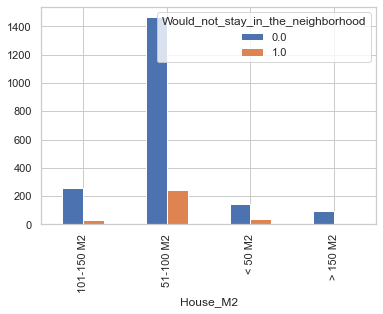

In [174]:
table = pd.crosstab(data.House_M2, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

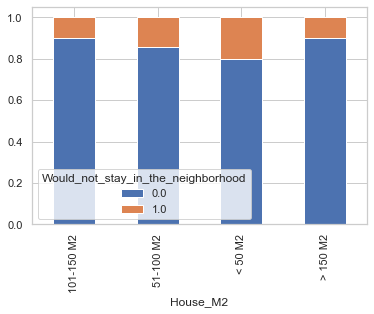

In [175]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

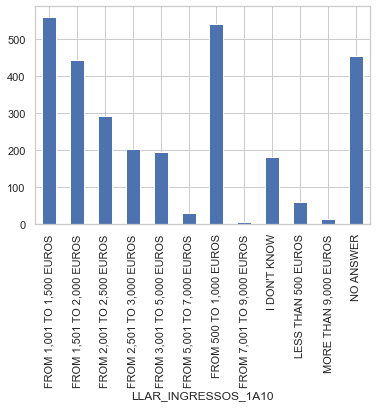

In [176]:
# WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED
survey_65.groupby(['LLAR_INGRESSOS_1A10']).size().plot.bar()

In [177]:
display(pd.crosstab(data.LLAR_INGRESSOS_1A10, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
LLAR_INGRESSOS_1A10,,
"FROM 1,001 TO 1,500 EUROS",398,73
"FROM 1,501 TO 2,000 EUROS",311,55
"FROM 2,001 TO 2,500 EUROS",217,28
"FROM 2,501 TO 3,000 EUROS",146,20
"FROM 3,001 TO 5,000 EUROS",141,14
"FROM 5,001 TO 7,000 EUROS",26,3
"FROM 500 TO 1,000 EUROS",375,76
"FROM 7,001 TO 9,000 EUROS",5,0
I DON'T KNOW,147,13


In [178]:
data.LLAR_INGRESSOS_1A10.unique()

array(['FROM 500 TO 1,000 EUROS', 'FROM 1,001 TO 1,500 EUROS',
       'FROM 3,001 TO 5,000 EUROS', 'FROM 2,001 TO 2,500 EUROS',
       'FROM 1,501 TO 2,000 EUROS', 'LESS THAN 500 EUROS', 'NO ANSWER',
       "I DON'T KNOW", 'FROM 2,501 TO 3,000 EUROS',
       'FROM 5,001 TO 7,000 EUROS', 'FROM 7,001 TO 9,000 EUROS',
       'MORE THAN 9,000 EUROS'], dtype=object)

In [179]:
data_prep = {'LESS THAN 500 EUROS': '< 1000 EUROS',
             'FROM 500 TO 1,000 EUROS': '< 1000 EUROS',
             'FROM 1,001 TO 1,500 EUROS': '1001-2000 EUROS',
             'FROM 1,501 TO 2,000 EUROS': '1001-2000 EUROS', 
             'FROM 2,001 TO 2,500 EUROS': '2001-3000 EUROS',
             'FROM 2,501 TO 3,000 EUROS': '2001-3000 EUROS',
             'FROM 3,001 TO 5,000 EUROS': '> 3000 EUROS', 
             'FROM 5,001 TO 7,000 EUROS': '> 3000 EUROS', 
             'FROM 7,001 TO 9,000 EUROS': '> 3000 EUROS',
             'MORE THAN 9,000 EUROS': '> 3000 EUROS',
             'NO ANSWER': np.nan,
             "I DON'T KNOW": np.nan             
             } 
data['Monthly_family_income'] = [data_prep[i] for i in data['LLAR_INGRESSOS_1A10']]

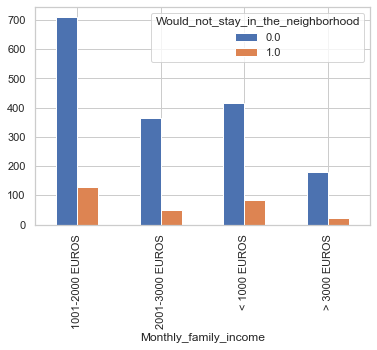

In [180]:
table = pd.crosstab(data.Monthly_family_income, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

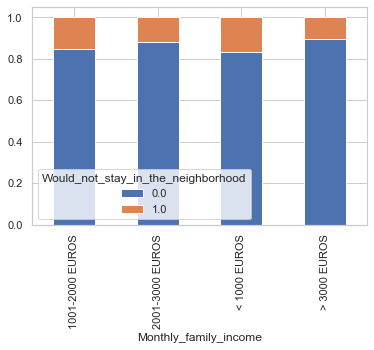

In [181]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

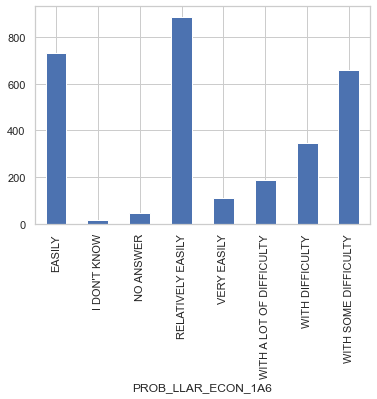

In [182]:
# IN RELATION TO THE TOTAL INCOME OF YOUR HOME, HOW DO YOU USUALLY ARRIVE AT THE END OF THE MONTH?
survey_65.groupby(['PROB_LLAR_ECON_1A6']).size().plot.bar()

In [183]:
display(pd.crosstab(data.PROB_LLAR_ECON_1A6, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
PROB_LLAR_ECON_1A6,,
EASILY,518,81
I DON'T KNOW,14,1
NO ANSWER,32,5
RELATIVELY EASILY,651,79
VERY EASILY,84,14
WITH A LOT OF DIFFICULTY,123,30
WITH DIFFICULTY,236,48
WITH SOME DIFFICULTY,466,85


In [184]:
data.PROB_LLAR_ECON_1A6.unique()

array(['WITH DIFFICULTY', 'RELATIVELY EASILY', 'EASILY',
       'WITH SOME DIFFICULTY', 'WITH A LOT OF DIFFICULTY', 'VERY EASILY',
       'NO ANSWER', "I DON'T KNOW"], dtype=object)

In [185]:
data_prep = {'WITH DIFFICULTY': 'WITH DIFFICULTY', 
             'RELATIVELY EASILY': 'EASILY', 
             'EASILY': 'EASILY',
             'WITH SOME DIFFICULTY': 'WITH DIFFICULTY', 
             'WITH A LOT OF DIFFICULTY': 'WITH DIFFICULTY', 
             'VERY EASILY': 'EASILY',
             'NO ANSWER': np.nan, 
             "I DON'T KNOW" : np.nan          
             } 
data['Arrive_at_the_end_of_the_month'] = [data_prep[i] for i in data['PROB_LLAR_ECON_1A6']]

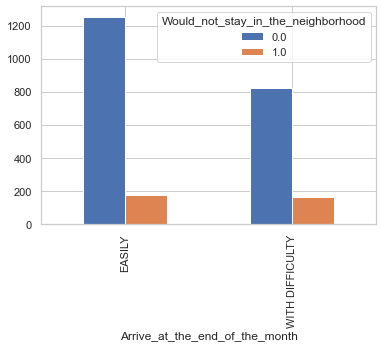

In [186]:
table = pd.crosstab(data.Arrive_at_the_end_of_the_month, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

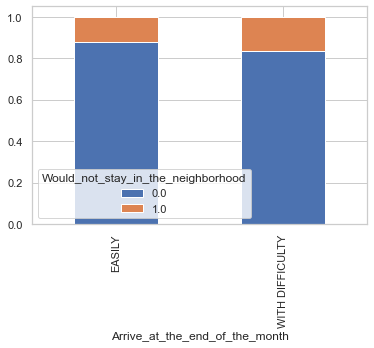

In [187]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

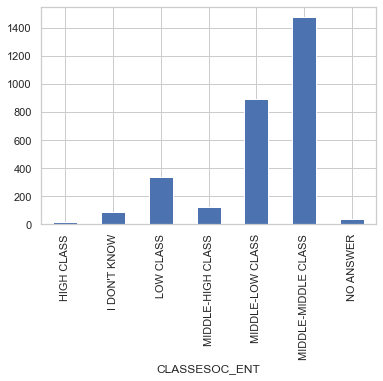

In [188]:
# COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO?
survey_65.groupby(['CLASSESOC_ENT']).size().plot.bar()

In [189]:
display(pd.crosstab(data.CLASSESOC_ENT, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
CLASSESOC_ENT,,
HIGH CLASS,13,2
I DON'T KNOW,61,5
LOW CLASS,216,49
MIDDLE-HIGH CLASS,91,13
MIDDLE-LOW CLASS,625,116
MIDDLE-MIDDLE CLASS,1091,154
NO ANSWER,27,4


In [190]:
data.CLASSESOC_ENT.unique()

array(['NO ANSWER', 'MIDDLE-LOW CLASS', 'MIDDLE-MIDDLE CLASS',
       'LOW CLASS', "I DON'T KNOW", 'HIGH CLASS', 'MIDDLE-HIGH CLASS'],
      dtype=object)

In [191]:
data_prep = {'MIDDLE-HIGH CLASS': 'MIDDLE-HIGH', 
             'MIDDLE-MIDDLE CLASS': 'MIDDLE-MIDDLE', 
             'MIDDLE-LOW CLASS': 'MIDDLE-LOW',
             "I DON'T KNOW": np.nan, #'MIDDLE-MIDDLE', # inserting most common value
             'LOW CLASS': 'LOW', 
             'NO ANSWER': np.nan, #'MIDDLE-MIDDLE', # inserting most common value
             'HIGH CLASS': 'HIGH'} 
data['Social_class'] = [data_prep[i] for i in data['CLASSESOC_ENT']]

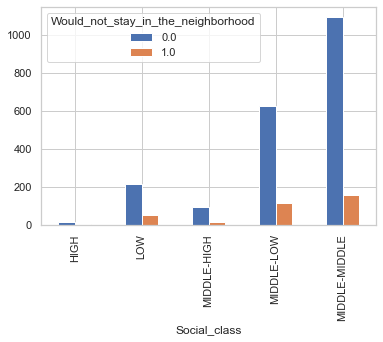

In [192]:
table = pd.crosstab(data.Social_class, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

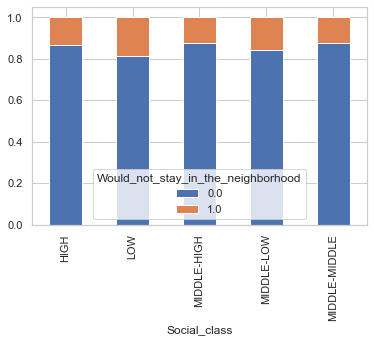

In [193]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

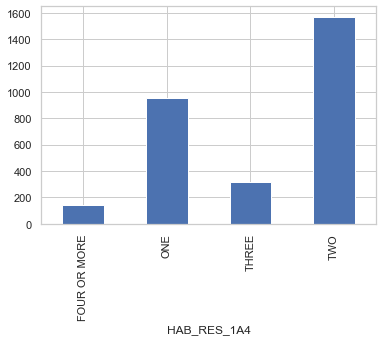

In [194]:
# WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED
survey_65.groupby(['HAB_RES_1A4']).size().plot.bar()

In [195]:
display(pd.crosstab(data.HAB_RES_1A4, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_RES_1A4,,
FOUR OR MORE,89,13
ONE,699,126
THREE,224,29
TWO,1112,175


In [196]:
data.HAB_RES_1A4.unique()

array(['FOUR OR MORE', 'ONE', 'TWO', 'THREE'], dtype=object)

In [197]:
data_prep = {'ONE': 1, 
             'TWO': 0, 
             'THREE': 0, 
             'FOUR OR MORE': 0} 
data['Living_alone'] = [data_prep[i] for i in data['HAB_RES_1A4']]

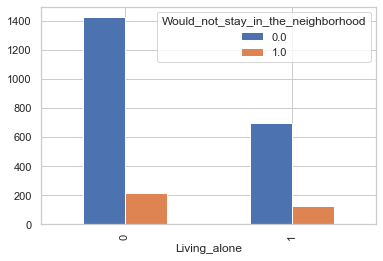

In [198]:
table = pd.crosstab(data.Living_alone, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

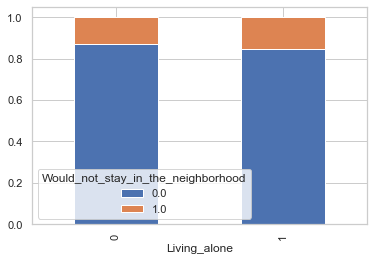

In [199]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

## 1.4.3 Feature engineering

In [200]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'NOM_BARRI',
 'GRANBARRI',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_0A10',
 'SATISF_RES_BCN_1A4',
 'VAL_GESTMUNI',
 'VAL_GESTMUNI_1A2',
 'VAL_ESCOMBRARIES',
 'VAL_NETEJA',
 'VAL_SOROLL',
 'VAL_VERD',
 'VAL_ENLLUM',
 'VAL_URBA',
 'VAL_ASFALT',
 'VAL_FACANES',
 'VAL_CIRCUL',
 'VAL_APARCA',
 'VAL_BUS',
 'VAL_METRO',
 'VAL_TRAM',
 'VAL_BICING',
 'VAL_GUB',
 'VAL_SPEIS',
 'VAL_SEGUR',
 'VAL_SEGUR_BARRI',
 'VAL_ESPORT',
 'VAL_SIAC',
 'VAL_CSS',
 'VAL_CULT',
 'VAL_FESTESPOP',
 'VAL_MERCAT',
 'VAL_BIBLIO',
 'VAL_CC',
 'VAL_ESCOMBRARIES_1A2',
 'VAL_NETEJA_1A2',
 'VAL_SOROLL_1A2',
 'VAL_VERD_1A2',
 'VAL_ENLLUM_1A2',
 'VAL_URBA_1A2',
 'VAL_ASFALT_1A2',
 'VAL_FACANES_1A2',
 'VAL_CIRCUL_1A2',
 'VAL_APARCA_1A2',
 'VAL_BUS_1A2',
 'VAL_METRO_1A2',
 'VAL_TRAM_1A2',
 'VAL_BICING_1A2',
 'VAL_GUB_1A2',
 'VAL_SPEIS_1A2',
 'VAL_SEGUR_1A2',
 'VAL_SEGUR_BARRI_1A2',
 'VAL_ESPORT_1A2',
 'VAL_SIAC_

Creating comparable variables - if respondends rate the city higher than the neighbourhood: 
'BCN_if_has_improved' & 'Barri_if_has_improved', 'BCN_if_will_improve' & 'Barri_if_will_improve', 'BCN_satisfaction_of_living' & 'Barri_satisfaction_of_living', 'BCN_city_management' & 'Barri_city_management', 'BCN_transport' & 'Barri_transport'.

In [201]:
for i in [('BCN_if_has_improved', 'Barri_if_has_improved'), 
          ('BCN_if_will_improve', 'Barri_if_will_improve'), 
          ('BCN_satisfaction_of_living', 'Barri_satisfaction_of_living'), 
          ('BCN_city_management', 'Barri_city_management'), 
          ('BCN_transport', 'Barri_transport')]:
    print(i)
    new_column = []
    for j in range(len(data)):
        if data.iloc[j][i[0]] == data.iloc[j][i[1]]:
            new_column.append('Equal')
        elif data.iloc[j][i[0]] > data.iloc[j][i[1]]:
            new_column.append('BCN over Barri')
        elif data.iloc[j][i[0]] < data.iloc[j][i[1]]:
            new_column.append('Barri over BCN')
    data['Compare_'+str(i[0][4:])] = new_column

('BCN_if_has_improved', 'Barri_if_has_improved')
('BCN_if_will_improve', 'Barri_if_will_improve')
('BCN_satisfaction_of_living', 'Barri_satisfaction_of_living')
('BCN_city_management', 'Barri_city_management')
('BCN_transport', 'Barri_transport')


In [202]:
for i in [('BCN_if_has_improved', 'Barri_if_has_improved'), 
          ('BCN_if_will_improve', 'Barri_if_will_improve'), 
          ('BCN_satisfaction_of_living', 'Barri_satisfaction_of_living'), 
          ('BCN_city_management', 'Barri_city_management'), 
          ('BCN_transport', 'Barri_transport')]:
    print(i)
    new_column = []
    for j in range(len(data)):
        if data.iloc[j][i[0]] < data.iloc[j][i[1]]:
            new_column.append(0)
        else:
            new_column.append(1)
    data['BCN_over_Barri_'+str(i[0][4:])] = new_column

('BCN_if_has_improved', 'Barri_if_has_improved')
('BCN_if_will_improve', 'Barri_if_will_improve')
('BCN_satisfaction_of_living', 'Barri_satisfaction_of_living')
('BCN_city_management', 'Barri_city_management')
('BCN_transport', 'Barri_transport')


In [203]:
data.head()

,ANY,NOM_DISTRICTE,NOM_BARRI,GRANBARRI,SEXE,EDAT1899_1A6,NACIO_ACT_UE,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,EVO1A_BCN,...,Compare_if_has_improved,Compare_if_will_improve,Compare_satisfaction_of_living,Compare_city_management,Compare_transport,BCN_over_Barri_if_has_improved,BCN_over_Barri_if_will_improve,BCN_over_Barri_satisfaction_of_living,BCN_over_Barri_city_management,BCN_over_Barri_transport
123813,2018,CIUTAT VELLA,EL RAVAL,EL RAVAL,WOMAN,65 YEARS AND OVER,SPANISH,MORE THAN 10 YEARS,MORE THAN 5 YEARS AND UP TO 10 YEARS,IT'S WORSE,...,Equal,Equal,BCN over Barri,BCN over Barri,BCN over Barri,1,1,1,1,1
123820,2018,CIUTAT VELLA,"SANT PERE, SANTA CATERINA I LA RIBERA","SANT PERE, SANTA CATERINA I LA RIBERA",MAN,65 YEARS AND OVER,SPANISH,I HAVE ALWAYS LIVED IN THE CITY,MORE THAN 10 YEARS,IT HAS IMPROVED,...,BCN over Barri,Equal,Equal,BCN over Barri,Equal,1,1,1,1,1
123844,2018,CIUTAT VELLA,EL BARRI GÒTIC,EL BARRI GÒTIC,MAN,65 YEARS AND OVER,SPANISH,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT HAS IMPROVED,...,BCN over Barri,Barri over BCN,Equal,Equal,Equal,1,0,1,1,1
123847,2018,CIUTAT VELLA,EL BARRI GÒTIC,EL BARRI GÒTIC,MAN,65 YEARS AND OVER,SPANISH,I HAVE ALWAYS LIVED IN THE CITY,MORE THAN 10 YEARS,IT'S WORSE,...,Barri over BCN,Barri over BCN,Barri over BCN,Equal,Equal,0,0,0,1,1
123851,2018,CIUTAT VELLA,"SANT PERE, SANTA CATERINA I LA RIBERA","SANT PERE, SANTA CATERINA I LA RIBERA",MAN,65 YEARS AND OVER,OTHER EU,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT'S WORSE,...,Equal,Barri over BCN,Equal,Equal,Equal,1,0,1,1,1


# 1.5 Final dataset

In [204]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'NOM_BARRI',
 'GRANBARRI',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_0A10',
 'SATISF_RES_BCN_1A4',
 'VAL_GESTMUNI',
 'VAL_GESTMUNI_1A2',
 'VAL_ESCOMBRARIES',
 'VAL_NETEJA',
 'VAL_SOROLL',
 'VAL_VERD',
 'VAL_ENLLUM',
 'VAL_URBA',
 'VAL_ASFALT',
 'VAL_FACANES',
 'VAL_CIRCUL',
 'VAL_APARCA',
 'VAL_BUS',
 'VAL_METRO',
 'VAL_TRAM',
 'VAL_BICING',
 'VAL_GUB',
 'VAL_SPEIS',
 'VAL_SEGUR',
 'VAL_SEGUR_BARRI',
 'VAL_ESPORT',
 'VAL_SIAC',
 'VAL_CSS',
 'VAL_CULT',
 'VAL_FESTESPOP',
 'VAL_MERCAT',
 'VAL_BIBLIO',
 'VAL_CC',
 'VAL_ESCOMBRARIES_1A2',
 'VAL_NETEJA_1A2',
 'VAL_SOROLL_1A2',
 'VAL_VERD_1A2',
 'VAL_ENLLUM_1A2',
 'VAL_URBA_1A2',
 'VAL_ASFALT_1A2',
 'VAL_FACANES_1A2',
 'VAL_CIRCUL_1A2',
 'VAL_APARCA_1A2',
 'VAL_BUS_1A2',
 'VAL_METRO_1A2',
 'VAL_TRAM_1A2',
 'VAL_BICING_1A2',
 'VAL_GUB_1A2',
 'VAL_SPEIS_1A2',
 'VAL_SEGUR_1A2',
 'VAL_SEGUR_BARRI_1A2',
 'VAL_ESPORT_1A2',
 'VAL_SIAC_

In [206]:
survey_transformed = data[['ANY', 
                           'Would_not_stay_in_the_neighborhood',
                           'Gender', 'NOM_DISTRICTE', 'Time_living_in_BCN', 'Time_living_in_barri',
                           'BCN_if_has_improved', 'BCN_if_will_improve', 'BCN_satisfaction_of_living',
                           'BCN_city_management', 'Barri_if_has_improved', 'Barri_if_will_improve',
                           'Barri_satisfaction_of_living', 'Barri_comparison', 'Barri_city_management',
                           'GARBAGE COLLECTION', 'STREETS CLEANING', 'NOISE', 'GREEN AREAS',
                           'PUBLIC LIGHTING', 'URBANISM', 'ASPHALT AND STREET CONSERVATION',
                           'FACADES AND BUILDING CONSERVATION', 'CIRCULATION', 'BUS', 'SUBWAY',
                           'MUNICIPAL POLICE', 'CITIZEN SECURITY IN THE CITY AS A WHOLE', 
                           'CITIZEN SECURITY IN THE NEIGHBORHOOD', 'MUNICIPAL MARKETS',
                           'BCN_transport', 'Barri_transport', 'Owns_a_car', 'Voted',
                           'Participate_in_association_in_barri', 'Person_to_help_with_housework',
                           'House_contract', 'House_M2', 'Monthly_family_income', 'Arrive_at_the_end_of_the_month',
                           'Social_class', 'Living_alone', 'Compare_if_has_improved', 'Compare_if_will_improve',
                           'Compare_satisfaction_of_living', 'Compare_city_management', 'Compare_transport',
                           'BCN_over_Barri_if_has_improved', 'BCN_over_Barri_if_will_improve',
                           'BCN_over_Barri_satisfaction_of_living', 'BCN_over_Barri_city_management',
                           'BCN_over_Barri_transport']]

In [207]:
survey_transformed.reset_index(drop=True, inplace=True)

In [208]:
survey_transformed.shape

(2980, 52)

In [209]:
survey_transformed.dropna(inplace=True)

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [210]:
survey_transformed.shape

(1761, 52)

In [211]:
survey_transformed.to_pickle("survey_transformed.pkl")